# EDA

## 1. Załaduj dane

In [69]:
# Standard imports
from typing import Tuple
import time

# Suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Third party imports
from haversine import haversine
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

# Local imports
from _csv_utils import data_timeplace, DataPathCleaningManager


In [70]:

data_path_manager = DataPathCleaningManager(data_timeplace)
combined_df = data_path_manager._load_cleaned_df(domain="combined")

In [71]:
import pandas as pd

def rename_columns(df: pd.DataFrame, translations: dict) -> pd.DataFrame:
    """
    Rename columns in a DataFrame with a MultiIndex according to provided translations.

    Args:
    df (pd.DataFrame): The DataFrame whose columns are to be renamed.
    translations (dict): A dictionary mapping the old column names (as tuples) to the new ones.

    Returns:
    pd.DataFrame: A new DataFrame with columns renamed.
    """
    
    # Create a new MultiIndex with the translated column names
    new_columns = []
    for col in df.columns:
        # Translate the column if it is in the translations, else keep the original
        new_col = translations.get(col, col)
        new_columns.append(new_col)

    new_index = pd.MultiIndex.from_tuples(new_columns)
    
    # Assign the new MultiIndex to the DataFrame and return it
    df.columns = new_index
    return df

# Dictionary of translations provided
columns_translation = {
    ('listing', 'link'): ('ogłoszenie', 'link'),
    ('listing', 'title'): ('ogłoszenie', 'tytuł'),
    ('listing', 'summary_description'): ('ogłoszenie', 'krótki_opis'),
    ('listing', 'remote_service'): ('ogłoszenie', 'usługa_zdalna'),
    ('pricing', 'price'): ('wycena', 'cena'),
    ('pricing', 'rent'): ('wycena', 'czynsz'),
    ('pricing', 'total_rent'): ('wycena', 'czynsz_całkowity'),
    ('pricing', 'total_rent_sqm'): ('wycena', 'czynsz_za_metr'),
    ('pricing', 'deposit'): ('wycena', 'kaucja'),
    ('pricing', 'deposit_ratio'): ('wycena', 'proporcja_kaucji'),
    ('location', 'complete_address'): ('lokalizacja', 'pełny_adres'),
    ('location', 'street'): ('lokalizacja', 'ulica'),
    ('location', 'city'): ('lokalizacja', 'miasto'),
    ('location', 'voivodeship'): ('lokalizacja', 'województwo'),
    ('size', 'square_meters'): ('wielkość', 'metry_kwadratowe'),
    ('size', 'number_of_rooms'): ('wielkość', 'liczba_pokoi'),
    ('size', 'floor'): ('wielkość', 'piętro'),
    ('size', 'attic'): ('wielkość', 'strych'),
    ('size', 'building_floors'): ('wielkość', 'liczba_pięter_budynku'),
    ('legal_and_availability', 'available_from'): ('własność_i_dostępność', 'dostępne_od'),
    ('legal_and_availability', 'completion'): ('własność_i_dostępność', 'zakończenie_budowy'),
    ('legal_and_availability', 'ownership'): ('własność_i_dostępność', 'własność'),
    ('legal_and_availability', 'rent_to_students'): ('własność_i_dostępność', 'wynajem_dla_studentów'),
    ('type_and_year', 'building_type'): ('rodzaj_i_rocznik', 'typ_budynku'),
    ('type_and_year', 'build_year'): ('rodzaj_i_rocznik', 'rok_budowy'),
    ('amenities', 'elevator'): ('udogodnienia', 'winda'),
    ('amenities', 'parking_space'): ('udogodnienia', 'miejsce_parkingowe'),
    ('equipment', 'no_information'): ('wyposażenie', 'brak_informacji'),
    ('equipment', 'stove'): ('wyposażenie', 'kuchenka'),
    ('equipment', 'fridge'): ('wyposażenie', 'lodówka'),
    ('equipment', 'furniture'): ('wyposażenie', 'meble'),
    ('equipment', 'oven'): ('wyposażenie', 'piekarnik'),
    ('equipment', 'washing_machine'): ('wyposażenie', 'pralka'),
    ('equipment', 'TV'): ('wyposażenie', 'telewizor'),
    ('equipment', 'dishwasher'): ('wyposażenie', 'zmywarka'),
    ('media_types', 'no_information'): ('media_komunikacyjne', 'brak_informacji'),
    ('media_types', 'internet'): ('media_komunikacyjne', 'internet'),
    ('media_types', 'telephone'): ('media_komunikacyjne', 'telefon'),
    ('media_types', 'cable_TV'): ('media_komunikacyjne', 'telewizja_kablowa'),
    ('heating', 'no_information'): ('ogrzewanie', 'brak_informacji'),
    ('heating', 'electric'): ('ogrzewanie', 'elektryczne'),
    ('heating', 'gas'): ('ogrzewanie', 'gazowe'),
    ('heating', 'other'): ('ogrzewanie', 'inne'),
    ('heating', 'boiler_room'): ('ogrzewanie', 'kotłownia'),
    ('heating', 'district'): ('ogrzewanie', 'miejskie'),
    ('heating', 'tile_stove'): ('ogrzewanie', 'piec_kaflowy'),
    ('security', 'no_information'): ('bezpieczeństwo', 'brak_informacji'),
    ('security', 'intercom_or_video_intercom'): ('bezpieczeństwo', 'domofon_lub_wideodomofon'),
    ('security', 'anti_burglary_doors_or_windows'): ('bezpieczeństwo', 'drzwi_lub_okna_antywłamaniowe'),
    ('security', 'monitoring_or_security'): ('bezpieczeństwo', 'monitoring_lub_ochrona'),
    ('security', 'anti_burglary_roller_blinds'): ('bezpieczeństwo', 'rolety_antywłamaniowe'),
    ('security', 'alarm_system'): ('bezpieczeństwo', 'system_alarmowy'),
    ('security', 'enclosed_area'): ('bezpieczeństwo', 'teren_ogrodzony'),
    ('windows', 'aluminum'): ('okna', 'aluminiowe'),
    ('windows', 'no_information'): ('okna', 'brak_informacji'),
    ('windows', 'wooden'): ('okna', 'drewniane'),
    ('windows', 'plastic'): ('okna', 'plastikowe'),
    ('building_material', 'concrete'): ('materiał_budowlany', 'beton'),
    ('building_material', 'aerated_concrete'): ('materiał_budowlany', 'beton_komórkowy'),
    ('building_material', 'no_information'): ('materiał_budowlany', 'brak_informacji'),
    ('building_material', 'brick'): ('materiał_budowlany', 'cegła'),
    ('building_material', 'wood'): ('materiał_budowlany', 'drewno'),
    ('building_material', 'other'): ('materiał_budowlany', 'inny'),
    ('building_material', 'lightweight_aggregate'): ('materiał_budowlany', 'keramzyt'),
    ('building_material', 'hollow_brick'): ('materiał_budowlany', 'pustak'),
    ('building_material', 'silicate'): ('materiał_budowlany', 'silikat'),
    ('building_material', 'large_panel'): ('materiał_budowlany', 'wielka_płyta'),
    ('building_material', 'reinforced_concrete'): ('materiał_budowlany', 'żelbet'),
    ('additional_information', 'no_information'): ('informacje_dodatkowe', 'brak_informacji'),
    ('additional_information', 'duplex'): ('informacje_dodatkowe', 'mieszkanie_dwupoziomowe'),
    ('additional_information', 'air_conditioning'): ('informacje_dodatkowe', 'klimatyzacja'),
    ('additional_information', 'separate_kitchen'): ('informacje_dodatkowe', 'oddzielna_kuchnia'),
    ('additional_information', 'basement'): ('informacje_dodatkowe', 'piwnica'),
    ('additional_information', 'utility_room'): ('informacje_dodatkowe', 'pomieszczenie_gospodarcze'),
    ('additional_information', 'non_smokers_only'): ('informacje_dodatkowe', 'tylko_dla_niepalących'),
}

combined_df = rename_columns(combined_df, columns_translation)

combined_df[('rodzaj_i_rocznik', 'typ_budynku')]= combined_df[('rodzaj_i_rocznik', 'typ_budynku')].map({
    'detached_house': 'dom_wolnostojący',
    'apartment_building': 'budynek_mieszkalny',
    'block_of_flats': 'blok',
    'historic_apartment_building': 'kamienica',
    'terraced_house': 'szeregowiec',
    })

## 2. Badania eksploracyjne

### 2.1 Dane numeryczne

In [72]:
combined_df.describe().rename(index={'count': 'liczba', 'mean': 'średnia', 'std': 'odchylenie standardowe'})

wycena                               \
                                cena      czynsz czynsz_całkowity   
liczba                   1106.000000  593.000000      1106.000000   
średnia                  2180.465642  463.910624      2429.198915   
odchylenie standardowe   1429.766366  252.601285      1442.413882   
min                       500.000000    1.000000       500.000000   
25%                      1500.000000  300.000000      1687.000000   
50%                      1900.000000  500.000000      2200.000000   
75%                      2500.000000  650.000000      2800.000000   
max                     19000.000000  990.000000     19001.000000   

                                                                      \
                       czynsz_za_metr        kaucja proporcja_kaucji   
liczba                         1106.0    742.000000       742.000000   
średnia                     51.876078   3477.051213         1.457399   
odchylenie standardowe      18.852072   3698.524190         0.848110   
min                          2.708333      2.000000         0.000000   
25%                         38.693878   2000.000000         1.000000   
50%                         50.575658   3000.000000         1.295000   
75%                         63.447965   3800.000000         1.760000   
max                        138.888889  57000.000000        12.000000   

                               wielkość                         \
                       metry_kwadratowe liczba_pokoi    piętro   
liczba                           1106.0       1106.0    1083.0   
średnia                       49.740506     2.119349  2.757156   
odchylenie standardowe        26.233006     0.858414   2.57227   
min                                 8.0          1.0      -1.0   
25%                                36.0          2.0       1.0   
50%                                45.0          2.0       2.0   
75%                                56.0          3.0       4.0   
max                               413.0          6.0      11.0   

                                             rodzaj_i_rocznik  
                       liczba_pięter_budynku       rok_budowy  
liczba                                 979.0       476.000000  
średnia                              5.48621      1993.170168  
odchylenie standardowe              3.828449        33.635859  
min                                      1.0      1893.000000  
25%                                      3.0      1975.000000  
50%                                      4.0      2011.500000  
75%                                      7.0      2021.000000  
max                                     25.0      2025.000000

11 piętro to piętra 10+

**Wnioski z danych numerycznych:**

1. **Oferty**<br>
Znajdują się w promieniu `25km`<br>
od `"Mierzęcice, Będziński, Śląskie"`, w pobliżu regionalnego lotniska międzynarodowego.<br>
Całkowita liczba ofert wynosi `1106`.
2. **Średni Całkowity Czynsz**:<br>
Mediana całkowitego czynszu wynosi `2200,00 PLN`.
3. **Zakres Czynszu i Odchylenie Standardowe**:<br>
Całkowity czynsz waha się od minimum `500` do maksimum `19,001`, przy odchyleniu standardowym wynoszącym `1442,41`.<br>Równocześnie szeroki zakres i duże odchylenie standardowe wskazują na znaczną zmienność cen wynajmu.
4. **Rozmiar Nieruchomości:**<br>
Średni rozmiar nieruchomości to około `49,74` metrów kwadratowych.<br>Najmniejsza nieruchomość ma `8` metrów kwadratowych, a największa `413` metrów kwadratowych.
5. **Rok Budowy**:<br>
Nieruchomości w zestawieniu danych zostały zbudowane między `1893` a `2025`, przy medianie roku budowy `2011`.<br>Dane obejmują szeroki zakres wieku nieruchomości, od historycznych po nowoczesne konstrukcje.
6. **Informacje o na którym piętrze jest mieszkanie**:<br>Mediana pięter, na których znajdują się nieruchomości to `2` piętro, wśród nieruchomości mieszczącymi się od poziomu piwnicy (`-1`) do `10 i wyższych` pięter. Mediana dla semj liczby pięter w budynkach to około `4`, co sugeruje, że większość nieruchomości znajduje się w budynkach niskich lub średniowysokich.
7. **Koszt za Metr Kwadratowy**:<br>
Średni koszt za metr kwadratowy wynosi `51,88 PLN`, przy cenach wahających się od tak niskich jak `2,71 PLN` do tak wysokich jak `138,89 PLN` za metr kwadratowy.

### 2.2 Czynsz całkowity

In [73]:
aesthetics_plots = {
	'title_size': 16,
    'y_and_x_label_size': 12,
	'fontweight': 'bold',
	'label_color': "#435672",
    "palette": "viridis",
    "figsize": {
        "multiplot": (15, 10),  # (width, height) in inches
        "singleplot": (8, 6),
        },
    }

def set_plot_aesthetics(ax, title=None, xlabel=None, ylabel=None, title_color="#435672", tick_color="#435672", fontweight='bold'):
    if title:
        ax.set_title(title, color=title_color, fontweight=fontweight)
    if xlabel:
        ax.set_xlabel(xlabel, fontweight=fontweight)
    if ylabel:
        ax.set_ylabel(ylabel, fontweight=fontweight)
    ax.tick_params(colors=tick_color, which='both')  # For both major and minor ticks
    ax.yaxis.label.set_color(tick_color)  # Y-axis label color
    ax.xaxis.label.set_color(tick_color)  # X-axis label color
    for spine in ax.spines.values():  # Spine color
        spine.set_edgecolor(tick_color)

def plot_distribution(data_series: pd.Series, title: str, kde_setting: bool, bin: int, x_ticks_number: int, x_ticks_rotation: bool):
    fig, ax = plt.subplots(figsize=aesthetics_plots['figsize']['singleplot'])

    cmap = plt.get_cmap('viridis')
    color = cmap(0.5)  # Using a single color, you can adjust this as needed

    sns.histplot(data_series, ax=ax, kde=kde_setting, bins=bin, color=color)
    set_plot_aesthetics(ax, title)

    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=x_ticks_number))
    if x_ticks_rotation:
        ax.xaxis.set_major_locator(ticker.FixedLocator(ax.get_xticks()))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    plt.ylabel('częstotliwość')

    # Add annotations for each bar
    for p in ax.patches:
        # Calculate the percentage of the total
        percentage = (p.get_height() / len(data_series)) * 100
        # Place the annotation above the bar
        if percentage > 0:
            ax.annotate(f"{percentage:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, weight='bold', color=aesthetics_plots['label_color'], xytext=(0, 2),
                        textcoords='offset points')

    plt.tight_layout()
    plt.show()

Cena łączna, zaawansowane statystyki:


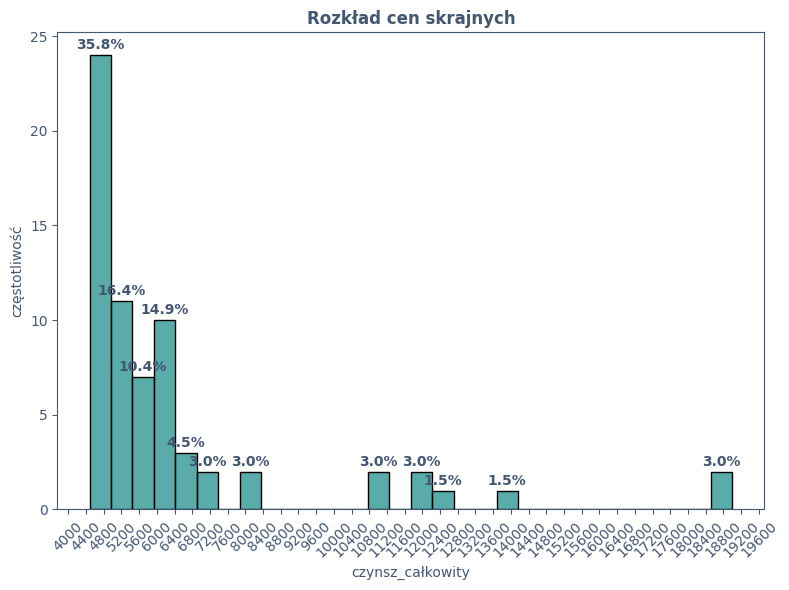

{'Średnia': 2429.2,
 'Mediana': 2200.0,
 'Odchylenie standardowe': 1442.41,
 'Dominanta': 1500.0,
 'Wariancja': 2080557.81,
 'Zakres': 18501.0,
 'Rozstęp międzykwartylowy (IQR)': 1113.0,
 'Skośność': 4.89,
 'Kurtoza': 41.71,
 'Kwantyle': 0.25    1687.0
 0.50    2200.0
 0.75    2800.0
 0.90    3557.5
 0.95    4569.5
 0.99    7270.0
 Name: czynsz_całkowity, dtype: float64,
 'Dolna granica wykrywania wartości odstających': 17.5,
 'Górna granica wykrywania wartości odstających': 4469.5,
 'Liczba wartości poniżej dolnej granicy': 67,
 'Liczba wartości powyżej górnej granicy': 0,
 'Liczba wartości odstających': 67,
 'Całkowita liczba ofert': 1106,
 'Stosunek liczby wartości odstających do całkowitej liczby ofert': '6.0%'}

In [74]:
def advanced_statistical_analysis(df: pd.DataFrame = combined_df):
    price_data = df['wycena']['czynsz_całkowity']

    # Central Tendency Measures
    mean_price = price_data.mean()
    median_price = price_data.median()
    mode_price = price_data.mode()[0]

    # Variability Measures
    std_dev_price = price_data.std()
    variance_price = price_data.var()
    range_price = price_data.max() - price_data.min()
    iqr_price = np.percentile(price_data, 75) - np.percentile(price_data, 25)

    # Skewness and Kurtosis
    skewness_price = price_data.skew()
    kurtosis_price = price_data.kurtosis()

    # Quantile Analysis
    quantiles_price = price_data.quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

    # Outlier Detection: Using the 1.5*IQR rule
    lower_bound = np.percentile(price_data, 25) - 1.5 * iqr_price
    upper_bound = np.percentile(price_data, 75) + 1.5 * iqr_price
    outliers_upper = price_data[(price_data >= upper_bound)].count()
    outliers_lower = price_data[(price_data <= lower_bound)].count()
    outlier_total = outliers_upper + outliers_lower
    outlier_data = price_data[(price_data <= lower_bound) | (price_data >= upper_bound)]

    advanced_statistics = {
        "Średnia": mean_price.round(2),
        "Mediana": median_price,
        "Odchylenie standardowe": std_dev_price.round(2),
        "Dominanta": mode_price,
        "Wariancja": variance_price.round(2),
        "Zakres": range_price,
        "Rozstęp międzykwartylowy (IQR)": iqr_price,
        "Skośność": skewness_price.round(2),
        "Kurtoza": kurtosis_price.round(2),
        "Kwantyle": quantiles_price,
        "Dolna granica wykrywania wartości odstających": lower_bound,
        "Górna granica wykrywania wartości odstających": upper_bound,
        "Liczba wartości poniżej dolnej granicy": outliers_upper,
        "Liczba wartości powyżej górnej granicy": outliers_lower,
        "Liczba wartości odstających": outlier_total,
        "Całkowita liczba ofert": price_data.count(),
        "Stosunek liczby wartości odstających do całkowitej liczby ofert": str((outlier_total / price_data.count()).round(2) * 100)+ "%",
    }

    print("Cena łączna, zaawansowane statystyki:")
    plot_distribution(outlier_data, 'Rozkład cen skrajnych', False, 30, 40, True)
    return advanced_statistics

advanced_statistical_analysis(combined_df)

**Wnioski z analizy cen wynajmu:**

1. **Tendencja cen wynajmu**:<br>
Wiele czynszów jest bardziej przystępnych cenowo, podczas gdy tylko kilka jest naprawdę drogich.

1. **Wyjątkowe ceny wynajmu**:<br>
Około `6%` cen wynajmu jest znacznie wyższych lub niższych od typowych.
Te kilka nietypowych czynszów może sprawić, że średnia będzie wyglądać na wyższą niż to, co widzi większość ludzi.

1. **Zróżnicowanie cen wynajmu**:<br>
Analizując dane dotyczące wynajmu, spektrum cen jest bardzo szerokie.<br>
Większość wynajmów `(75%)` jest w przeciętnych cenach.<br>
Jednak patrząc na ceny wyższe od przeciętnych ceny wynajmu znacząco rosną.<br>
Górne `5%` nieruchomości mają czynsze znacznie wyższe od średniej,<br>
a górne `1%` znajdują się w jeszcze bardziej ekskluzywnym przedziale cenowym.<br>


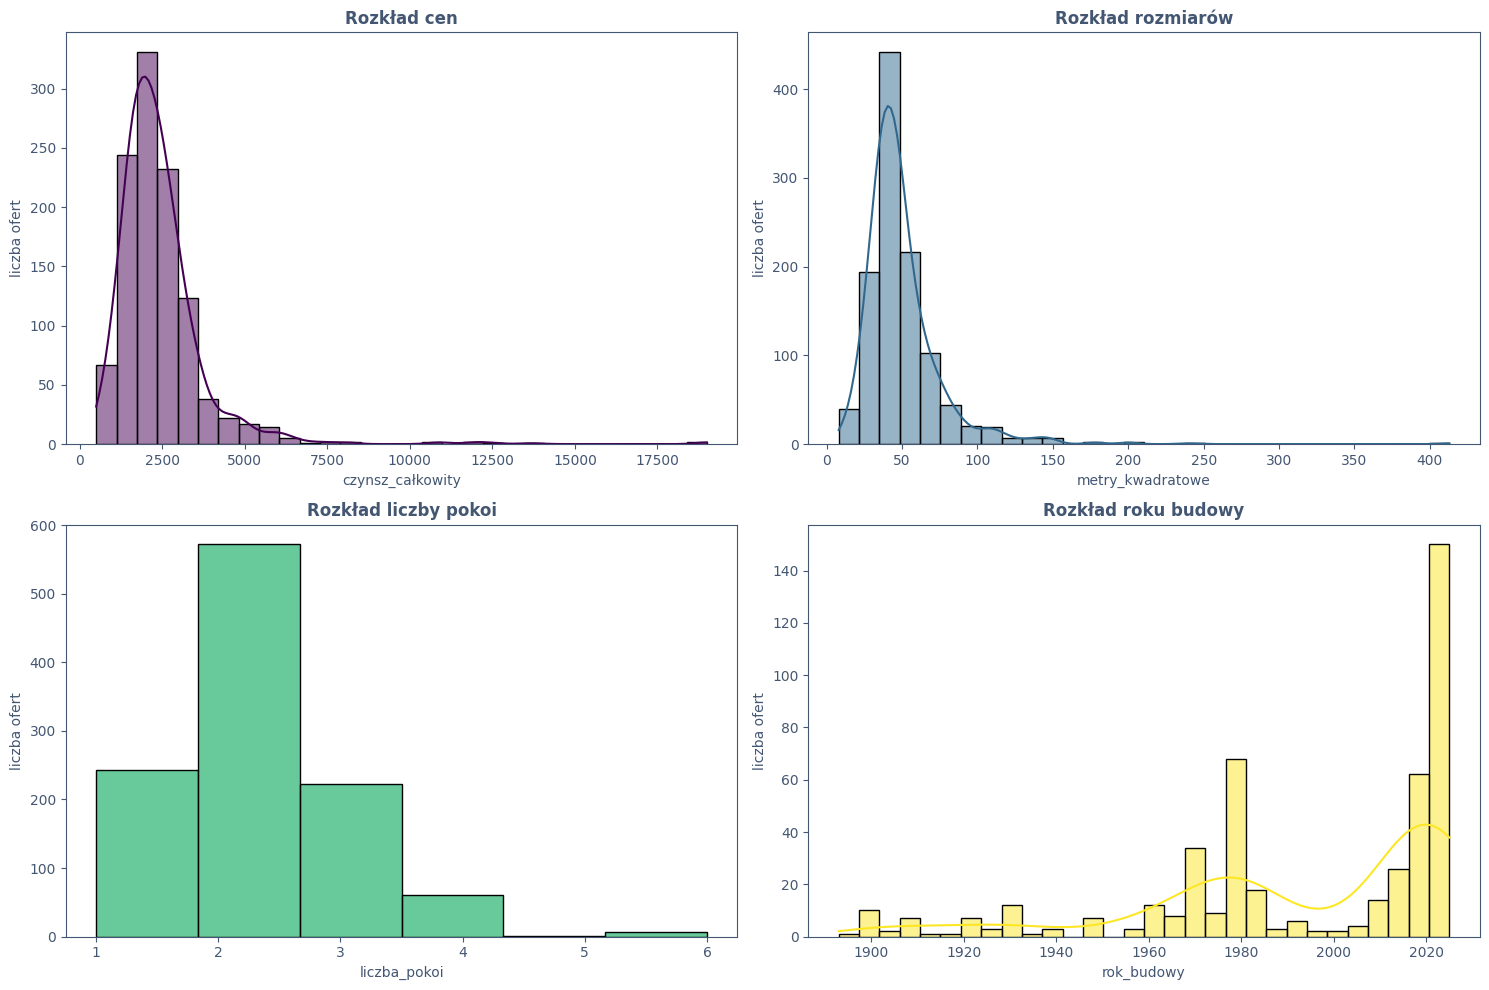

In [75]:
def plot_distribution(combined_df: pd.DataFrame):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=aesthetics_plots['figsize']['multiplot'])

    cmap = plt.get_cmap('viridis')
    colors = cmap(np.linspace(0, 1, 4))

    titles = ["Rozkład cen", "Rozkład rozmiarów", "Rozkład liczby pokoi", "Rozkład roku budowy"]
    data_columns = ['wycena.czynsz_całkowity', 'wielkość.metry_kwadratowe', 'wielkość.liczba_pokoi', 'rodzaj_i_rocznik.rok_budowy']
    kde_settings = [True, True, False, True]
    bins = [30, 30, 6, 30]

    for ax, title, color, data_column, kde_setting, bin in zip(axes.flat, titles, colors, data_columns, kde_settings, bins):
        sns.histplot(combined_df[data_column.split('.')[0]][data_column.split('.')[1]].astype('float'), ax=ax, kde=kde_setting, bins=bin, color=color)
        ax.set_ylabel("liczba ofert")
        set_plot_aesthetics(ax, title)

    plt.tight_layout()
    plt.show()

plot_distribution(combined_df)

**Wnioski z danych liczbowych:**

1. **Ceny wynajmu**:<br>
Większość czynszów jest niska, z najczęszczą kwotą około `2500`. Nie ma zbyt wielu drogich mieszkań do wynajęcia.

2. **Wielkość mieszkań**:<br>
Częstsze są mniejsze mieszkania (około `50 m2`) niż większe. Dużych apartamentów jest niewiele.
Większość dostępnych mieszkań składa się z dwóch pomieszczeń dodatkowych poza kuchnią, łazienką oraz ewentualnym korytarzem.

1. **Wiek Budynków**:<br>
Wiele budynków zostało wzniesionych około roku `1980`, a ostatnio obserwujemy wzrost nowych budowli od około `2020`.<br>
Ogólnie widać brak starych budynków na rynku wynajmu.

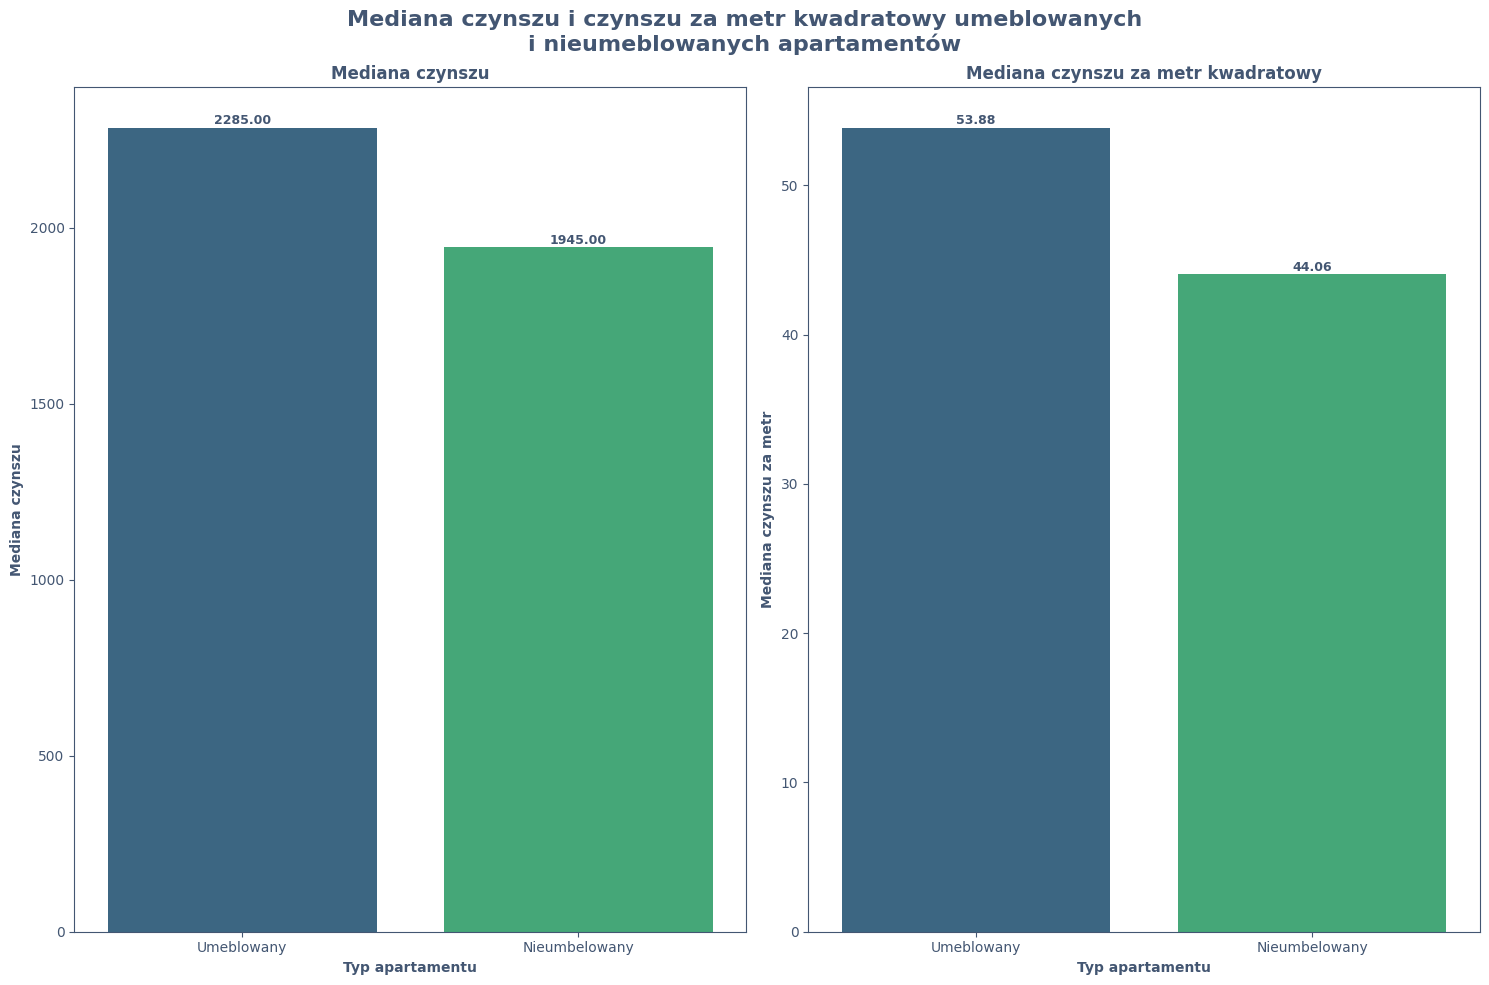

Różnice median:
Umeblowane vs nieumeblowane: 340.0 PLN
Umeblowane vs nieumeblowane na metr kwadratowy: 10.0 PLN


In [76]:
def set_plot_aesthetics(ax, title=None, xlabel=None, ylabel=None, title_color="#435672", tick_color="#435672", fontweight='bold'):
    if title:
        ax.set_title(title, color=title_color, fontweight=fontweight)
    if xlabel:
        ax.set_xlabel(xlabel, fontweight=fontweight)
    if ylabel:
        ax.set_ylabel(ylabel, fontweight=fontweight)
    ax.tick_params(colors=tick_color, which='both')  # For both major and minor ticks
    ax.yaxis.label.set_color(tick_color)  # Y-axis label color
    ax.xaxis.label.set_color(tick_color)  # X-axis label color
    for spine in ax.spines.values():  # Spine color
        spine.set_edgecolor(tick_color)

def plot_distribution(combined_df: pd.DataFrame):

    # No information about furniture delete
    # refactor

    # Calculate medians
    median_furnished = combined_df[combined_df['wyposażenie']['meble']]['wycena']['czynsz_całkowity'].median()
    median_unfurnished = combined_df[~combined_df['wyposażenie']['meble']]['wycena']['czynsz_całkowity'].median()
    
    median_furnished_sqm = (combined_df[combined_df['wyposażenie']['meble']]['wycena']['czynsz_za_metr']).median()
    median_unfurnished_sqm = (combined_df[~combined_df['wyposażenie']['meble']]['wycena']['czynsz_za_metr']).median()

    # Prepare data for plotting
    median_data_furnishing = pd.DataFrame({
        'Umeblowanie': ['Umeblowany', 'Nieumbelowany'],
        'Mediana czynszu': [median_furnished, median_unfurnished]
    })

    median_data_square_meter = pd.DataFrame({
        'Umeblowanie': ['Umeblowany', 'Nieumbelowany'],
        'Mediana czynszu za metr kwadratowy': [median_furnished_sqm, median_unfurnished_sqm]
    })

    title = 'Mediana czynszu i czynszu za metr kwadratowy umeblowanych\ni nieumeblowanych apartamentów'

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=aesthetics_plots['figsize']['multiplot'])

    # Plotting Median Rent
    sns.barplot(x='Umeblowanie', y='Mediana czynszu', data=median_data_furnishing, ax=ax1, palette='viridis')

    # Plotting Median Czynsz per Square Meter
    sns.barplot(x='Umeblowanie', y='Mediana czynszu za metr kwadratowy', data=median_data_square_meter, ax=ax2, palette='viridis')

    for ax in [ax1, ax2]:
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', fontsize=9, color=aesthetics_plots["label_color"], fontweight='bold',
                        xytext=(0, 5),
                        textcoords='offset points')
            
    # Apply aesthetics to each subplot
    set_plot_aesthetics(ax1, title='Mediana czynszu', xlabel='Typ apartamentu', ylabel='Mediana czynszu')
    set_plot_aesthetics(ax2, title='Mediana czynszu za metr kwadratowy', xlabel='Typ apartamentu', ylabel='Mediana czynszu za metr')

    # Set the main title for the figure
    fig.suptitle(title, color="#435672", fontsize=aesthetics_plots['title_size'], fontweight='bold')


    plt.tight_layout()
    plt.show()

    print(f"Różnice median:")
    print(f"Umeblowane vs nieumeblowane: {abs(median_furnished - median_unfurnished)} PLN")
    print(f"Umeblowane vs nieumeblowane na metr kwadratowy: {(abs(median_furnished_sqm - median_unfurnished_sqm)).round()} PLN")

plot_distribution(combined_df)

**Wnioski dotyczące cen mieszkań umeblowanych vs nieumeblowanych:**

1. **Wyższy czynsz za mieszkania umeblowane**:<br>
Mieszkania umeblowane mają wyższy czynsz w porównaniu do nieumeblowanych o `340 PLN`.<br>
Sugeruje to, że najemcy płacą więcej za dodatkową wygodę.

1. **Umeblowanie nieznacznie podnosi cenę**:<br>
Różnica w cenie wynajmu za metr kwadratowy pomiędzy mieszkaniami umeblowanymi a nieumeblowanymi jest marginalna (`10 PLN`), co może oznaczać, że za umeblowanie płaci się niewielką dopłatę bez względu na rozmiar mieszkania.

In [77]:
def show_categorical_data_percentage_distribution(
        df: pd.DataFrame, 
        categorical_column: Tuple[str, str], 
        distribution_column: Tuple[str, str], 
        title: str,
        x_ticks_number: int = 10,
        y_ticks_number: int = 8,
        x_ticks_rotation: bool = True,
        y_ticks_rotation: bool = True,
    ):
    
    # Create a subset DataFrame with only the required columns
    plot_data = df[[categorical_column, distribution_column]].dropna()

    # Set up the matplotlib figure
    plt.figure(figsize=(14, 7))

    # Get unique building types from the categorical column
    building_types = plot_data[categorical_column].unique()

    # Generate a list of colors, one for each building type
    my_palette = ['#bfed2d'] + ['#00c37f'] + ["#007e90"] + ['#51006f'] + ["#FF9F66"]

    ax = plt.gca()  # Get the current Axes instance on the current figure matching the given keyword args, or create one.

    # Plot each building type's histogram
    for building_type, color in zip(building_types, my_palette):
        # Select the rows where the building type matches and is not null
        subset = plot_data[plot_data[categorical_column] == building_type]
        sns.histplot(subset[distribution_column], kde=False, color=color, label=building_type, ax=ax)

    
    # Add some formatting and titles
    x_axis_title = distribution_column[1].replace('_', ' ')

    plt.title(title, color=aesthetics_plots['label_color'], fontsize=aesthetics_plots['title_size'], weight=aesthetics_plots['fontweight'])
    plt.xlabel(x_axis_title, color=aesthetics_plots['label_color'], fontsize=aesthetics_plots['y_and_x_label_size'], weight=aesthetics_plots['fontweight'])
    plt.ylabel('częstotliwość', color=aesthetics_plots['label_color'], fontsize=aesthetics_plots['y_and_x_label_size'], weight=aesthetics_plots['fontweight'])

    legend = plt.legend(title=x_axis_title)
    plt.setp(legend.get_title(), fontsize='large', color=aesthetics_plots['label_color'], weight='bold')
    plt.setp(legend.get_texts(), color=aesthetics_plots['label_color'])

    # Customize x-axis ticks
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=x_ticks_number))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=y_ticks_number))

    if x_ticks_rotation:
        ax.xaxis.set_major_locator(ticker.FixedLocator(ax.get_xticks()))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        
    if y_ticks_rotation:
        ax.yaxis.set_major_locator(ticker.FixedLocator(ax.get_yticks()))
        ax.set_yticklabels(ax.get_yticklabels(), rotation=45)

    plt.xticks(color=aesthetics_plots['label_color'])
    plt.yticks(color=aesthetics_plots['label_color'])
    
    sns.despine(right=True, top=True)

    # Add annotations for each bar
    for p in ax.patches:
        # Calculate the percentage of the total
        percentage = (p.get_height() / len(df)) * 100
        # Place the annotation above the bar
        if percentage > 0:
            ax.annotate(f"{percentage:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color=aesthetics_plots['label_color'], xytext=(0, 8),
                        textcoords='offset points')

    # Show the plot
    plt.show()

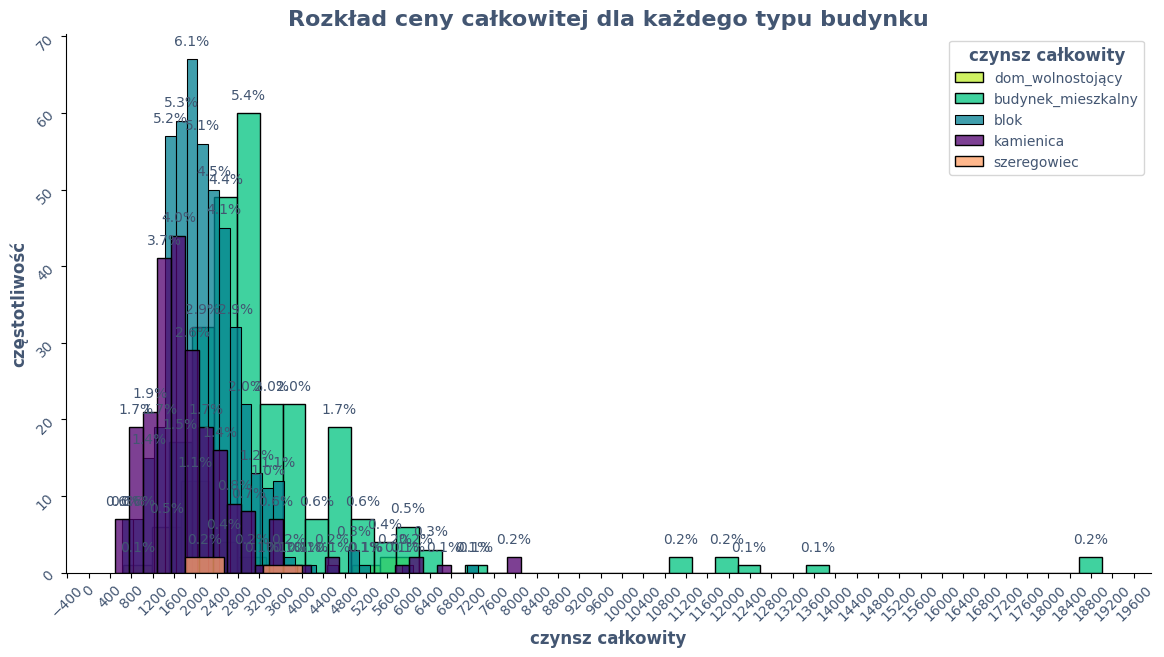

In [78]:
show_categorical_data_percentage_distribution(
    combined_df,  
    ('rodzaj_i_rocznik', 'typ_budynku'),
    ('wycena', 'czynsz_całkowity'),
    'Rozkład ceny całkowitej dla każdego typu budynku',
    x_ticks_number= 60,
    x_ticks_rotation= True
    )

**Wnioski z rozkładu cen każdego typu budynku**:

1. **Budynki Mieszkalne**:<br>
Ceny mieszkań w budynkach mieszkalnych wahają się od `400` do `8000` PLN, z większością ofert skupionych w przedziale od `400` do `3.200` PLN. Większość ofert jest dostępna w przystępnej cenie, co jest korzystne dla osób z ograniczonym budżetem.

1. **Bloki Mieszkalne**:<br>
Ceny w blokach mieszkalnych wykazują różnorodność, z cenami mieszkań rozciągającymi się od `800` do `3.600` PLN, przy okazjonalnych ofertach w wyższej cenie (`4.800` do `5.000` PLN).

1. **Kamienice**:<br>
W historycznych kamienicach ceny mieszkań obejmują szeroki zakres – od `400` do `3.600` PLN, z kilkoma apartamentami w wyższym segmencie cenowym (`4.000`, `5.600`, `6.000`, `8.000` PLN).

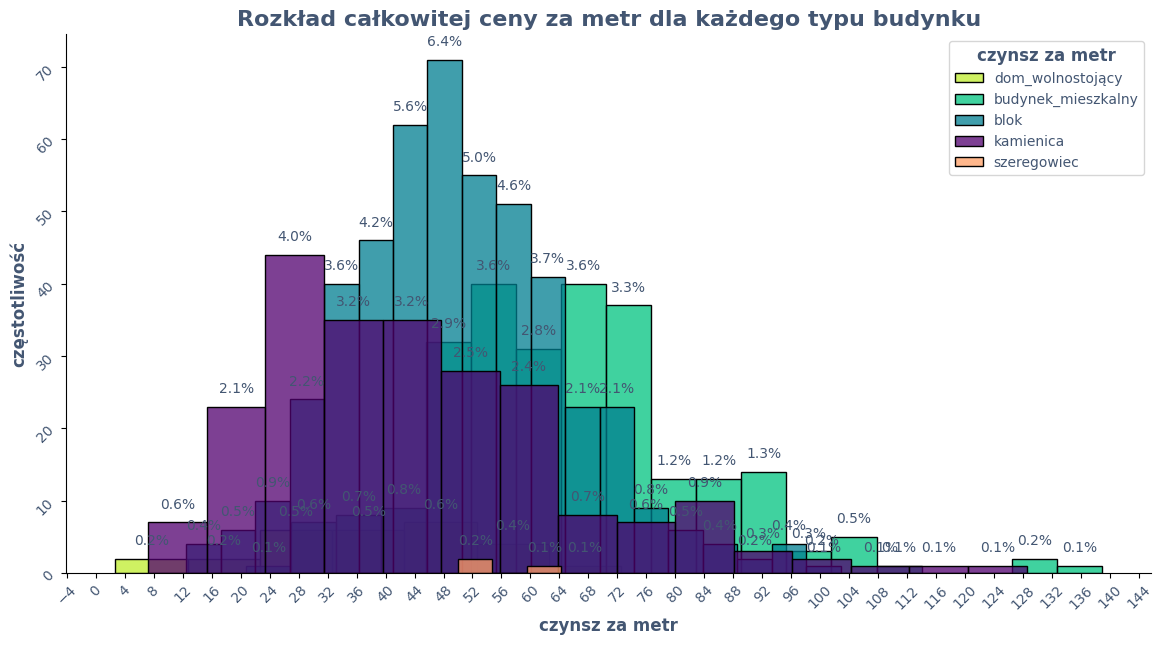

In [79]:
show_categorical_data_percentage_distribution(
    combined_df,  
    ('rodzaj_i_rocznik', 'typ_budynku'),
    ('wycena', 'czynsz_za_metr'),
    'Rozkład całkowitej ceny za metr dla każdego typu budynku',
    x_ticks_number= 40,
    x_ticks_rotation= True
    )

**Wnioski z cen za metr kwadratowy na podstawie różnych typów budynków**:

1. **Cena za Metr w Budynkach Mieszkalnych**:<br>
W budynkach mieszkalnych cena za metr kwadratowy zazwyczaj wynosi około `50` PLN. Jest to najczęściej spotykany przedział cenowy w tej kategorii.

1. **Cena za Metr w Historycznych Kamienicach**:<br>
W historycznych kamienicach ceny za metr kwadratowy są bardziej zróżnicowane. Większość ofert koncentruje się w niższych i wyższych zakresach cenowych, z wyraźnym skupieniem wokół `24` PLN za m².

1. **Cena za Metr w Domach Szeregowych**:<br>
Chociaż domy szeregowe są rzadziej spotykane, to oferują one większą przestrzeń za niższą cenę za metr kwadratowy, z przedziałem cenowym przeważnie od `4` do `24` PLN za m². To wskazuje na korzystniejsze warunki dla szukających przestronniejszych mieszkań za umiarkowaną cenę.

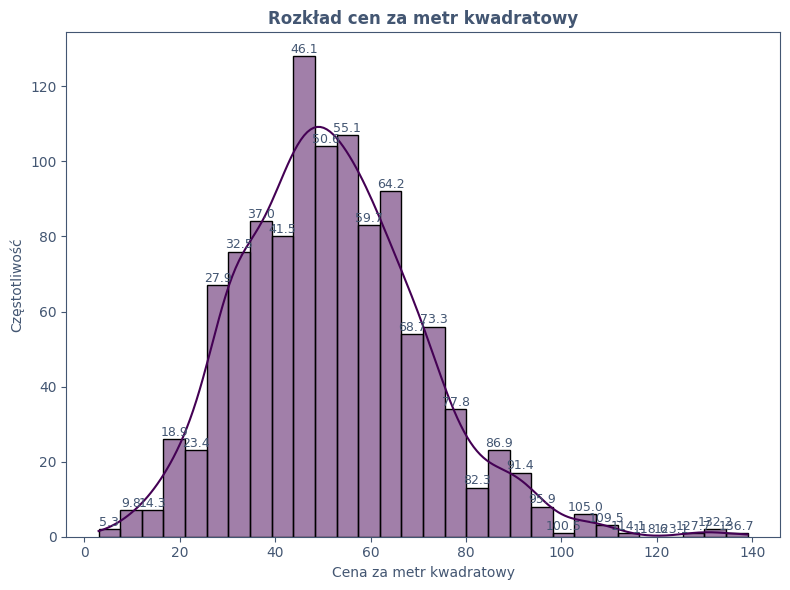

In [80]:
def plot_distribution(combined_df: pd.DataFrame):

    # Calculation with handling of potential division by zero or NaN values
    plot_data = combined_df['wycena']['czynsz_za_metr']
    plot_data = plot_data.dropna().round().astype('float')

    cmap = plt.get_cmap('viridis')
    colors = cmap(np.linspace(0, 1, 4))
    color = colors[0]
    title = 'Rozkład cen za metr kwadratowy'

    fig, ax = plt.subplots(figsize=aesthetics_plots['figsize']['singleplot'])
    hist = sns.histplot(plot_data, kde=True, bins=30, color=color, ax=ax)
    ax.set_xlabel('Cena za metr kwadratowy')
    ax.set_ylabel('Częstotliwość')

    for p in hist.patches:
        bin_center = p.get_x() + p.get_width() / 2
        ax.annotate(f'{bin_center:.1f}', (bin_center, p.get_height()), 
                    ha='center', va='center', fontsize=9, color=aesthetics_plots["label_color"], xytext=(0, 5),
                    textcoords='offset points')
        
    set_plot_aesthetics(ax, title)

    plt.tight_layout()
    plt.show()

plot_distribution(combined_df)

**Wnioski cena za metr kwadratowy**:

1. **Powszechne ceny wynajmu**:<br>
Większość mieszkań kosztuje około `50` PLN za każdy metr kwadratowy.<br>
Rzadziej spotyka się mieszkania, za które pobiera się wyższą opłatę za metr kwadratowy.

1. **Niewiele mieszkań z wyższą stawką**:<br>
Diagram wskazuje, że choć istnieją pojedyncze mieszkania z wyjątkowo wysoką ceną za metr kwadratowy,
są one stosunkowo rzadkie. Większość ofert utrzymuje się w standardowym zakresie cen.

In [81]:
CategoryResults = list[Tuple[str, str, float]]

def get_correlations(data: pd.DataFrame):
    
    def get_correlation_category(bottom_threshold: float, upper_threshold: float = 1.0):

        category_results: CategoryResults = []
        num_columns = len(columns)

        for i in range(num_columns):
            for j in range(i+1, num_columns):

                corr_value = correlations.iloc[i, j]
                col_left = columns[i]
                col_right = columns[j]

                category_results = add_correlation_value(
                        bottom_threshold, 
                        upper_threshold, 
                        category_results, 
                        corr_value, 
                        col_left, 
                        col_right
                    )
        
        sorted_results = sorted(category_results, key=lambda x: x[2], reverse=True)
        return sorted_results

    def add_correlation_value(
                bottom_threshold: float, 
                upper_threshold: float, 
                category_results: CategoryResults, 
                corr_value: float, 
                col_left: str, 
                col_right: str
            ):

        if upper_threshold == 1.0:
            if bottom_threshold <= abs(corr_value):
                category_results.append((col_left, col_right, corr_value))
        else:
            if bottom_threshold <= abs(corr_value) < upper_threshold:
                category_results.append((col_left, col_right, corr_value))

        return category_results
    
    correlations = data.corr()
    columns = correlations.columns
    correlations_results = {}
    
    correlations_results['Silna korelacja'] = get_correlation_category(bottom_threshold = 0.7)
    correlations_results['Przeciętna korelacja'] = get_correlation_category(bottom_threshold = 0.3, upper_threshold = 0.7)
    correlations_results['Słaba korelacja'] = get_correlation_category(bottom_threshold = 0.1, upper_threshold = 0.3)

    return correlations_results

def print_results(correlations_results: dict[str, CategoryResults]):

    for level, results in correlations_results.items():
        print(f"\n{level}:")
        for col_left, col_right, corr_value in results:
            print(f"{col_left} - {col_right}: {round(corr_value, 2)}")
        print("\r")

def print_correlations(data: pd.DataFrame):
    
    correlations_results = get_correlations(data)
    
    print_results(correlations_results)

def get_top_extreme_results(correlations_results: dict[str, CategoryResults], column_of_interest: str, num_positive_negative: int):

    top_positive = []

    positive_count = 0

    for _, results in correlations_results.items():

        for col_left, col_right, corr_value in results:

            if corr_value > 0:

                correlation_cols = [col_left, col_right]

                if column_of_interest in correlation_cols:

                    if positive_count == num_positive_negative:
                        break

                    corr_item = (col_left, col_right, corr_value)

                    top_positive.append(corr_item)

                    positive_count += 1

        if positive_count == num_positive_negative:
            break

    top_negative = []

    negative_count = 0

    reversed_dict = dict(reversed(correlations_results.items()))

    for _, results in reversed_dict.items():

        for col_left, col_right, corr_value in results:

            if corr_value < 0:

                correlation_cols = [col_left, col_right]

                if column_of_interest in correlation_cols:

                    if negative_count == num_positive_negative:
                        break

                    corr_item = (col_left, col_right, corr_value)

                    top_negative.insert(0, corr_item)

                    negative_count += 1

        if negative_count == num_positive_negative:
            break

    top_positive.extend(top_negative)

    return top_positive

In [82]:

def show_extreme_correlations(data: pd.DataFrame, column_of_interest: Tuple[str, str], num_results: int = 5, title: str = "Add title"):

    columns_to_drop = [('wycena', 'cena'), ('wycena', 'czynsz')]
    data = data.drop(columns=columns_to_drop)
    correlations_results = get_correlations(data)
    extreme_correlations = get_top_extreme_results(correlations_results, column_of_interest, num_results)

    unique_elements = list(
        set([item[0] for item in extreme_correlations] + [item[1] for item in extreme_correlations])
    )
    correlation_values = np.zeros((len(unique_elements), len(unique_elements)))

    element_index_mapping = {
        element: index for index, element in enumerate(unique_elements)
    }

    for item in extreme_correlations:
        col1, col2, corr_value = item
        row_index = element_index_mapping[col2]
        col_index = element_index_mapping[col1]
        correlation_values[row_index, col_index] = corr_value

    df = pd.DataFrame(correlation_values, index=unique_elements, columns=unique_elements)
    df_column_of_interest = df[[column_of_interest]]
    df_no_empty_value = df_column_of_interest.drop(index=column_of_interest)
    df_no_0 = df_no_empty_value.drop(df_no_empty_value[df_no_empty_value.eq(0).all(axis=1)].index)
    df_plot = df_no_0.sort_values(by=column_of_interest, ascending=False)

    with plt.style.context('seaborn'):
        plt.figure(figsize=aesthetics_plots['figsize']['singleplot'])
        heatmap = sns.heatmap(df_plot, cmap='coolwarm', vmin = -1.0, vmax = 1.0, annot=True, fmt=".2f", annot_kws={'color': "white", 'fontweight': "bold"}, cbar=True, cbar_kws={"label": "Correlation"})
        # set color palette proportional to values 1.0 is always max 0.0 always least color value
        heatmap.set_xlabel("")
        heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, color=aesthetics_plots['label_color'])
        heatmap.set_xticklabels([])
        
        # Add the following lines
        cbar = heatmap.collections[0].colorbar
        cbar.set_ticks([heatmap.collections[0].get_array().min(), heatmap.collections[0].get_array().max()])
        cbar.set_ticks([-1.0, 0, 1.0])  # Set the tick locations
        cbar.set_ticklabels(['-1.0', '0.0', '1.0'])  # Set the tick labelss
        cbar.ax.yaxis.set_ticklabels(cbar.ax.yaxis.get_ticklabels(), color=aesthetics_plots['label_color'])  # Set the tick label color
        cbar.set_label("Korelacja", color=aesthetics_plots['label_color'])
        
        plt.title(f'Korelacja: {title}\n', color=aesthetics_plots['label_color'], fontsize = aesthetics_plots['title_size'], weight=aesthetics_plots['fontweight'])
        plt.show()


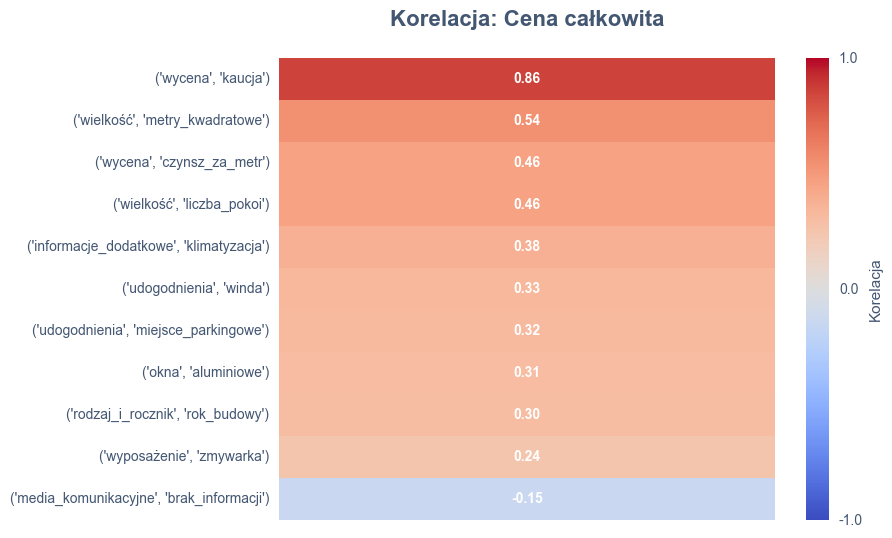

In [83]:
show_extreme_correlations(combined_df, ('wycena', 'czynsz_całkowity'), num_results = 10, title="Cena całkowita")

**Wnioski z korelacji ceny całkowitej**:

1. **Związek między kaucją a ceną wynajmu**:<br>
Istnieje silna dodatnia zależność między wysokością kaucji a całkowitą ceną, wskazując na korelację wynoszącą `0.86`.<br>
Sugeruje to, że droższe oferty wynajmu zazwyczaj wymagają wyższej kaucji.

1. **Wielkość ma znaczenie**:<br>
Rozmiar mieszkania, mierzony w metrach kwadratowych, ma istotną dodatnią korelację (`0.54`) z całkowitą ceną,<br>
Liczba pokoi również wykazuje dodatnią korelację (`0.46`) z ceną, choć nie jest ona tak silna jak w przypadku wielkości w metrach kwadratowych,<br>co wskazuje, że ogólny rozmiar może mieć większy wpływ na cenę niż sama liczba pokoi.

1. **Brak Informacji, a inne cechy**:<br>
Mieszkania z dodatkami, takimi jak klimatyzacja, mają tendencję do wyższych cen, co potwierdza korelacja `0.38`.<br>
Z kolei oferty z mniejszą ilością informacji lub ich brakiem często są nieco tańsze – tu korelacja wynosi (`-0.15`). Może to oznaczać, że mniej kosztowne oferty często są mniej szczegółowo opisane.

Inne korelacje:

In [84]:
print_correlations(combined_df)


Silna korelacja:
('wycena', 'cena') - ('wycena', 'czynsz_całkowity'): 0.98
('wyposażenie', 'kuchenka') - ('wyposażenie', 'lodówka'): 0.89
('wyposażenie', 'lodówka') - ('wyposażenie', 'pralka'): 0.89
('wycena', 'cena') - ('wycena', 'kaucja'): 0.88
('wycena', 'czynsz_całkowity') - ('wycena', 'kaucja'): 0.86
('wyposażenie', 'kuchenka') - ('wyposażenie', 'pralka'): 0.85
('wyposażenie', 'kuchenka') - ('wyposażenie', 'piekarnik'): 0.84
('wyposażenie', 'lodówka') - ('wyposażenie', 'piekarnik'): 0.78
('wyposażenie', 'piekarnik') - ('wyposażenie', 'pralka'): 0.76
('media_komunikacyjne', 'internet') - ('media_komunikacyjne', 'telewizja_kablowa'): 0.73
('wielkość', 'piętro') - ('wielkość', 'liczba_pięter_budynku'): 0.71
('media_komunikacyjne', 'brak_informacji') - ('media_komunikacyjne', 'telewizja_kablowa'): -0.79
('bezpieczeństwo', 'brak_informacji') - ('bezpieczeństwo', 'domofon_lub_wideodomofon'): -0.85
('wyposażenie', 'brak_informacji') - ('wyposażenie', 'meble'): -0.87
('okna', 'brak_infor

**Wnioski z innych korelacji:**

1. **Cena najmu jako główny koszt**:<br>
Prawie doskonała korelacja (`0.98`) między `'ceną najmu'` a `'całkowitym czynszem'` wskazuje, że cena najmu konsekwentnie przyczynia się do całkowitego kosztu wynajmu, a w mniejszym stopniu koszty dodatkowe jak np. `czynsz` dla spółdzielni.

1. **Kompletne wyposażenie**:<br>
Wyraźne powiązania między elementami wyposażenia, takimi jak `kuchenka`, `lodówka`, `pralka` i `piekarnik` (korelacje od `0.78` do `0.89`), pokazują, że te urządzenia często są oferowane razem w ofertach wynajmu. Jeśli mieszkanie posiada jedno z tych urządzeń, zwykle ma też pozostałe.

1. **Wyposażenie a bezpieczeństwo**:<br>
Umiarkowana pozytywna zależność (`0.68` do` 0.64`) między posiadaniem podstawowych sprzętów AGD (`kuchenka`, `lodówka`, `pralka`) a systemami bezpieczeństwa takimi jak `domofon` lub `wideodomofon`, sugeruje, że mieszkania z nowoczesnym wyposażeniem często kładą również nacisk na aspekty bezpieczeństwa.

### 2.3 Lokalizacja

In [85]:
def count_and_percentage_with_distance(df, column_name, city_coords, city_populations):

    # Flatten the index to avoid groupby issues
    df_temp = pd.DataFrame()
    df_temp[str(column_name)] = df[column_name]
    column_name = str(column_name)
    df_temp['mediana ceny'] = df[('wycena', 'czynsz_całkowity')]
    df_temp['mediana metry kwadratowe'] = df[('wielkość', 'metry_kwadratowe')]
    df_temp['mediana ceny za metr kwadratowy'] = df[('wycena', 'czynsz_za_metr')]

    if column_name not in df_temp.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")

    # Calculate count and percentage
    count = df_temp[column_name].value_counts(dropna=False)
    percentage = df_temp[column_name].value_counts(dropna=False, normalize=True) * 100

    # Create a DataFrame from the count and percentage
    result = pd.DataFrame({
        'Ilość': count,
        'Procent': percentage
    }).reset_index()

    # Rename the 'index' column to the actual column name for clarity
    result.rename(columns={'index': column_name}, inplace=True)

    # Add median ('pricing', 'total_rent')
    grouped = df_temp.groupby(column_name)
    median_rent = grouped['mediana ceny'].median()
    median_sqm = grouped['mediana metry kwadratowe'].median()
    median_sqm_rent = grouped['mediana ceny za metr kwadratowy'].median().round(2)

    result = result.join(median_rent, on=column_name)
    result = result.join(median_sqm, on=column_name)
    result = result.join(median_sqm_rent, on=column_name)

    # Calculate the distance from the central city for each city
    central_city = 'Mierzęcice, Będziński, Śląskie'
    central_city_coords = city_coords['central_city'][central_city]
    
    result[f'odległość od {central_city} (km)'] = result.apply(
        lambda row: round(haversine(central_city_coords, city_coords['distance_from_central_city'].get(row[column_name], (None, None)), unit='km'), 2)
        if row[column_name] in city_coords['distance_from_central_city'] else None, axis=1)

    # Add city population information
    result['Populacja miasta (tysiące)'] = result[column_name].map(city_populations)

    return result

In [86]:
city_populations = {
    "Katowice": 286,
    "Sosnowiec": 191,
    "Bytom": 161,
    "Dąbrowa Górnicza": 116,
    "Chorzów": 105,
    "Jaworzno": 89,
    "tarnogórski": 45, # Rular area
    "będziński": 38, # Rular area
    "Siemianowice Śląskie": 65,
    "Mysłowice": 72,
    "Piekary Śląskie": 54,
    "Świętochłowice": 49,
    "Ruda Śląska": 135,
    "myszkowski": 32, # Rular area
    "częstochowski": 119, # Rular area
    "zawierciański": 43,  # Rular area
    "Zawada": 0.16  # Rular area
}

city_coords = {
    "central_city": {
        "Mierzęcice, Będziński, Śląskie": (50.4441, 19.12405)
    },
    "distance_from_central_city": {
        "Katowice": (50.258598, 19.020420),
        "Sosnowiec": (50.286263, 19.104078),
        "Bytom": (50.348160, 18.917561),
        "Dąbrowa Górnicza": (50.325910, 19.187200),
        "Chorzów": (50.297642, 18.955420),
        "Jaworzno": (50.203439, 19.272156),
        "tarnogórski": (50.444241, 18.856491),
        "będziński": (50.415352, 19.11304),
        "Siemianowice Śląskie": (50.30563, 19.028088),
        "Mysłowice": (50.209621, 19.132166),
        "Piekary Śląskie": (50.375779, 18.937939),
        "Świętochłowice": (50.298945, 18.907466),
        "Ruda Śląska": (50.270348, 18.864388),
        "myszkowski": (50.605529, 19.294746),
        "częstochowski": (50.7979, 19.1247),
        "zawierciański": (50.54427, 19.619602),
        "Zawada": (50.43734, 19.096938),
    }
}

locations_summary = count_and_percentage_with_distance(combined_df, ('lokalizacja', 'miasto'), city_coords, city_populations)
locations_summary

,"('lokalizacja', 'miasto')",Ilość,Procent,mediana ceny,mediana metry kwadratowe,mediana ceny za metr kwadratowy,"odległość od Mierzęcice, Będziński, Śląskie (km)",Populacja miasta (tysiące)
0,Katowice,514,46.473779,2600.0,45.0,59.3,21.90,286.00
1,Sosnowiec,145,13.110307,2000.0,44.0,47.37,17.61,191.00
2,Bytom,122,11.030741,1610.0,41.5,40.19,18.11,161.00
3,Dąbrowa Górnicza,68,6.148282,2200.0,46.5,49.4,13.88,116.00
4,Chorzów,61,5.515371,1800.0,39.0,45.44,20.21,105.00
5,Jaworzno,36,3.254973,1800.5,40.0,45.37,28.75,89.00
6,tarnogórski,33,2.983725,1986.0,48.0,42.5,18.95,45.00
7,będziński,32,2.893309,1965.0,44.0,49.06,3.29,38.00
8,Siemianowice Śląskie,23,2.079566,1750.0,42.0,43.79,16.83,65.00
9,Mysłowice,21,1.898734,2000.0,52.0,43.24,26.08,72.00


In [87]:
locations_summary[["('lokalizacja', 'miasto')", "mediana ceny", "mediana ceny za metr kwadratowy"]].sort_values(by="mediana ceny za metr kwadratowy", ascending=False)

,"('lokalizacja', 'miasto')",mediana ceny,mediana ceny za metr kwadratowy
16,Zawada,1900.0,73.08
0,Katowice,2600.0,59.3
3,Dąbrowa Górnicza,2200.0,49.4
7,będziński,1965.0,49.06
1,Sosnowiec,2000.0,47.37
4,Chorzów,1800.0,45.44
5,Jaworzno,1800.5,45.37
8,Siemianowice Śląskie,1750.0,43.79
9,Mysłowice,2000.0,43.24
6,tarnogórski,1986.0,42.5


**Wnioski dotyczące lokalizacji i ceny**:

1. **Wyższe czynsze w większych miastach**:<br>
`Katowice`, największe miasto z `286 000` mieszkańców, prowadzą zarówno pod względem liczby ofert (`514`), jak i cen wynajmu. Średni czynsz wynosi tam `2600` PLN, a cena za metr kwadratowy to `57,78` PLN. Pokazuje to, że w większych miastach, takich jak `Katowice`, koszty życia, w tym wynajem, są ogólnie wyższe.

1. **Wzrost czynszu wraz z wielkością miasta**:<br>
W większych miastach czynsz zwykle jest droższy. Na przykład, w `Katowicach` i `Sosnowcu`, które mają większe populacje, średnie czynsze wynoszą odpowiednio `2600` PLN i `2000` PLN. W przeciwieństwie do tego, mniejsze obszary, takie jak `Zawiercie` i `Myszkowski`, mają znacznie niższe czynsze.
1. **Wpływ lokalizacji na czynsz**:<br>
Odległość od `Mierzęcic, Będzińskiego, Śląskiego` ma wpływ na wysokość czynszu. Bliższe lokalizacje, takie jak powiat `Będziński` (odległość `3,29` km), mają niższą cenę za metr kwadratowy (`44,66` PLN) w porównaniu z dalszymi miastami, takimi jak `Jaworzno` (odległość `28,75` km) z `45,01` PLN za metr kwadratowy.

In [88]:
map_df = data_path_manager.load_df("map", is_cleaned=True)

In [89]:
print("Unikalne współrzędne geograficzne:")
len(map_df['coords'].unique())

Unikalne współrzędne geograficzne:


112

In [90]:
def show_property_map(
        map_df: pd.DataFrame, title: str = "", 
        center_coords: tuple[float, float] = None, 
        center_marker_name: str = "Mierzęcice, Będziński, Śląskie", 
        zoom: float = 10.0
        ):
    
    def extract_lat_lon(coord):
        coord_parts = coord.strip('()').split(', ')
        coord_tuple = tuple(float(part) if part.strip() != "None" else None for part in coord_parts)
        return coord_tuple

    def create_heatmap_data(plot_data: pd.DataFrame) -> go.Figure:
        
        def get_hovertemplate(row):

            labels = ["Miasto:", "Ulica:", "Cena całkowita:", "Cena:", "Czynsz:", "Metry kwadratowe:", "Cena/m²:", "Umeblowane:"]
            max_label_length = max(len(label) for label in labels)
            font_style = "font-family:monospace;"

            return (
                f"<span style='{font_style}'>{'Miasto:'.ljust(max_label_length)}</span> {row['city']}<br>"
                f"<span style='{font_style}'>{'Ulica:'.ljust(max_label_length)}</span> {row['complete_address'].replace((', ' + row['city']), '') if row['city'] else row['complete_address']}<br>"
                f"<span style='{font_style}'>{'Cena całkowita:'.ljust(max_label_length)}</span> {row['price_total']}<br>"
                f"<span style='{font_style}'>{'Cena:'.ljust(max_label_length)}</span> {row['price']}<br>"
                f"<span style='{font_style}'>{'Czynsz:'.ljust(max_label_length)}</span> {row['rent']}<br>"
                f"<span style='{font_style}'>{'Metry kwadratowe:'.ljust(max_label_length)}</span> {row['sqm']}<br>"
                f"<span style='{font_style}'>{'Cena/m²:'.ljust(max_label_length)}</span> {row['rent_sqm']}<br>"
                f"<span style='{font_style}'>{'Umeblowane:'.ljust(max_label_length)}</span> {row['is_furnished']}<extra></extra>"
            )

        offer_counts = plot_data.groupby(['Latitude', 'Longitude']).size().reset_index(name='offer_count')
        plot_data = plot_data.merge(offer_counts, on=['Latitude', 'Longitude'])

        plot_data['hovertemplate'] = plot_data.apply(get_hovertemplate, axis=1)

        return go.Densitymapbox(
            lat=plot_data['Latitude'],
            lon=plot_data['Longitude'],
            z=plot_data['offer_count'],  # Use offer count as density
            radius=10,
            colorscale='Viridis',
            zmin=0,
            zmax=plot_data['offer_count'].max(),  # Maximum count of offers
            hovertemplate=plot_data['hovertemplate'],
            colorbar=dict(
                title='Ilość<br>ofert:',
            )
        )

    def update_fig(fig: go.Figure, mapbox_zoom: float, mapbox_center: dict):
        fig.update_layout(
            title_text=title,
            mapbox_style='carto-positron',
            mapbox_zoom=mapbox_zoom,
            mapbox_center=mapbox_center,
            margin=dict(l=0, r=0, t=40, b=0),
            coloraxis_colorbar=dict(
                title="Number<br>of<br>offers:",
                title_side='right',
                title_font=dict(size=20),
                y=-2,
                yanchor='middle'
            )
        )
        return fig
    
    map_df['rent_sqm'] = map_df['rent_sqm'].round(2)
    
    lat_lon = map_df['coords'].apply(extract_lat_lon)
    map_df['Latitude'], map_df['Longitude'] = zip(*lat_lon)

    heatmap = create_heatmap_data(map_df)
    fig = go.Figure(data=[heatmap])

    # Determine the center of the map
    if center_coords is None:
        center_coords = {"lat": map_df['Latitude'].mean(), "lon": map_df['Longitude'].mean()}
    else:
        center_coords = {"lat": center_coords[0], "lon": center_coords[1]}
        # Add a pin (marker) at the center coordinates
        fig.add_trace(go.Scattermapbox(
            lat=[center_coords['lat']],
            lon=[center_coords['lon']],
            mode='markers+text',  # Include 'text' in the mode
            marker=go.scattermapbox.Marker(
                size=10,
                color='red'
            ),
            text=[center_marker_name],  # Set the label text
            textposition="bottom right",  # Position the text
            showlegend=False,
        ))

    fig = update_fig(fig, mapbox_center=center_coords, mapbox_zoom=zoom)
    fig.show()

# Example usage
show_property_map(map_df, "Mapa cen nieruchomości", center_coords=(50.460740, 19.093210), center_marker_name = "Mierzęcice, Będziński, Śląskie", zoom=9)

### 2.4 Cechy i wyposażenie

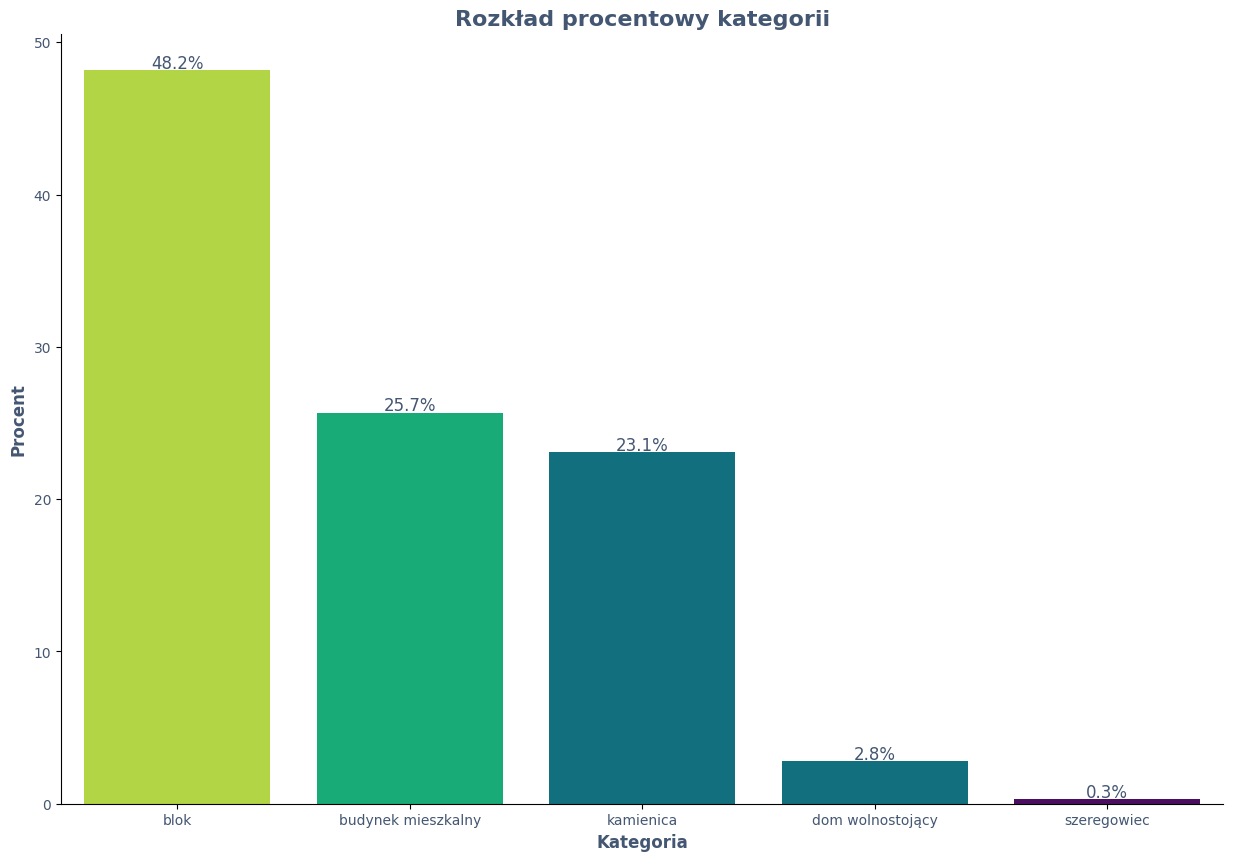

In [91]:
def display_category_proportions(data: pd.Series, title: str):

    # Calculate the percentage of each category
    category_percentage = data.value_counts(normalize=True) * 100

    # Create a bar plot
    fig, ax = plt.subplots(figsize=aesthetics_plots["figsize"]["multiplot"])
    my_palette = ['#bfed2d'] + ['#00c37f'] + ["#007e90"] + ['#51006f']*2

    unique_categories = data.unique()
    length = len(unique_categories)
    if (length - 5) <= 0:
        adjusted_length = 1
    else:
        adjusted_length = length - 5
    my_palette = ['#bfed2d'] + ['#00c37f'] + ["#007e90"]*2 + ['#51006f']*adjusted_length

    # Make the index more readable
    more_readable_index = []
    for _index in category_percentage.index:
        more_readable_index.append(_index.replace('_', ' '))
    category_percentage.index = more_readable_index

    sns.barplot(x=category_percentage.index, y=category_percentage.values, ax=ax, palette=my_palette)
    
    # Add labels to the plot
    plt.title(title, color=aesthetics_plots['label_color'], fontsize=aesthetics_plots['title_size'], weight=aesthetics_plots['fontweight'])
    plt.xlabel('Kategoria', color=aesthetics_plots['label_color'], fontsize=aesthetics_plots['y_and_x_label_size'], weight=aesthetics_plots['fontweight'])
    plt.ylabel('Procent', color=aesthetics_plots['label_color'], fontsize=aesthetics_plots['y_and_x_label_size'], weight=aesthetics_plots['fontweight'])

    plt.xticks(color=aesthetics_plots['label_color'])
    plt.yticks(color=aesthetics_plots['label_color'])
    
    sns.despine(right=True, top=True)


    # Add percentage labels on the bars
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color=aesthetics_plots['label_color'], xytext=(0, 5),
                    textcoords='offset points')

    # Display the plot
    plt.show()


display_category_proportions(combined_df[('rodzaj_i_rocznik', 'typ_budynku')], "Rozkład procentowy kategorii")

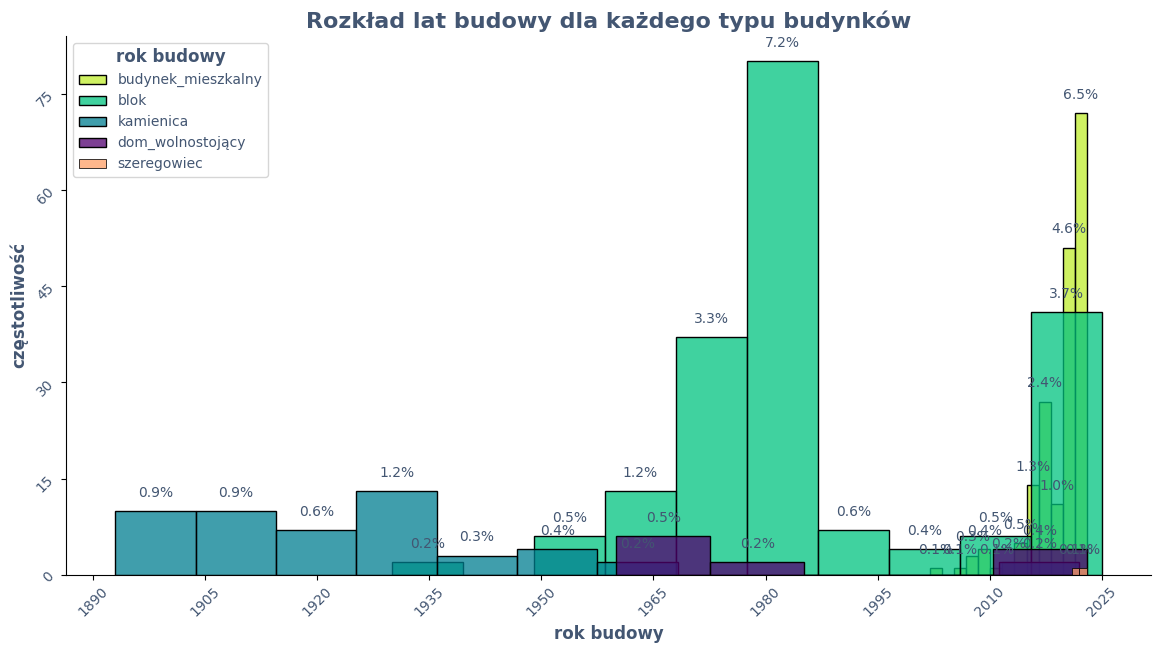

In [92]:
show_categorical_data_percentage_distribution(
    combined_df,  
    ('rodzaj_i_rocznik', 'typ_budynku'),
    ('rodzaj_i_rocznik', 'rok_budowy'),
    'Rozkład lat budowy dla każdego typu budynków'
    )

**Wnioski dotyczące typu budynku i roku budowy**:

1. **Blok mieszkalne**:<br>
obejmujący `48,2%` zbioru danych, jest dominującą kategorią, wskazującą na silną preferencję dla ofert mieszkaniowych. Wybór ten jest powszechny zarówno w "historycznych obszarach miejskich", jak i w późniejszej erze, często charakteryzującej się "budownictwem wielkopłytowym" z czasów komunizmu, a także w nowszych inwestycjach, pokazując stałą podaż na tego typu mieszkania w różnych epokach.

1. **Trendy w urbanistyce**:<br>
Znaczący wzrost budownictwa po roku `2000` wskazuje na wzrost dostępności nowszych rezydencji. Jednak `"domy szeregowe"` i `"domy wolnostojące"` stanowią odpowiednio tylko `0,3%` i `2,8%` typów mieszkań. Ten niedobór sugeruje trend rozwoju urbanistycznego, który faworyzuje budynki wielopiętrowe zamiast pojedynczych domów, wskazując na preferencję dla ekspansji pionowej w zabudowie mieszkaniowej.


In [93]:
def move_index_to_last(series, index_to_move):
    """
    Moves a specified index to the last position in a pandas Series.

    Args:
    series (pd.Series): The original series.
    index_to_move (str): The index to be moved to the last position.

    Returns:
    pd.Series: A new series with the specified index moved to the last position.
    """
    if index_to_move not in series.index:
        raise ValueError(f"Index '{index_to_move}' not found in the Series.")

    # Extracting the indices
    idx_list = series.index.tolist()

    # Remove the index to move and then append it at the end
    idx_list.remove(index_to_move)
    idx_list.append(index_to_move)

    # Reindexing the series
    return series.reindex(idx_list)

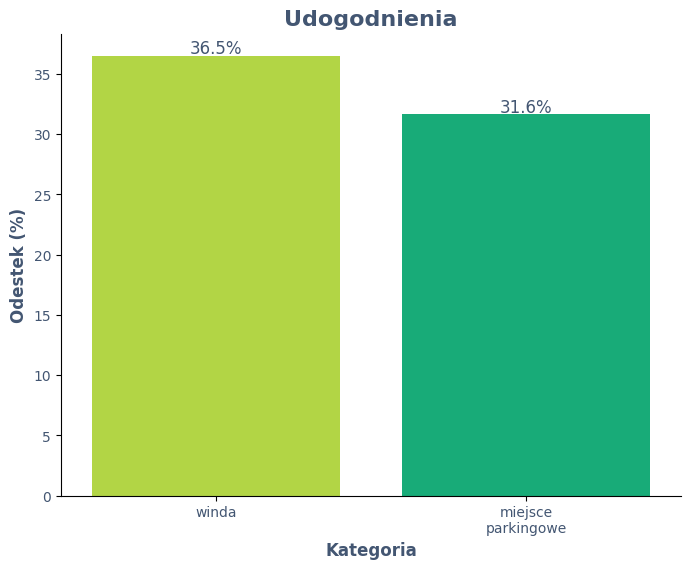

In [102]:
def visualize_true_percentage_by_category(df: pd.DataFrame, main_category: str):
    # Check if the DataFrame contains the main category
    if main_category not in df.columns.get_level_values(0):
        raise KeyError(f"Main category '{main_category}' not found in DataFrame.")

    # Extract subcategories for the given main category
    subcategories = [col for col in df.columns if col[0] == main_category]

    # Calculate percentage of True values for each subcategory
    percentages = {}
    for subcat in subcategories:
        percentages[subcat[1]] = (df[subcat].sum() / len(df)) * 100

    # Convert to Series for plotting
    category_percentage = pd.Series(percentages)

    # Sort by percentage, 'no_information' should be last
    category_percentage = category_percentage.sort_values(ascending=False)
    if 'brak_informacji' in category_percentage.index:
        category_percentage = move_index_to_last(category_percentage, 'brak_informacji')

    # Create a bar plot
    if category_percentage.index.__len__() >= 5:
        plot_size = aesthetics_plots["figsize"]["multiplot"]
    else:
        plot_size = aesthetics_plots["figsize"]["singleplot"]

    fig, ax = plt.subplots(figsize=plot_size)

    # Set the palette
    length = len(category_percentage.index)
    if (length - 5) <= 0:
        adjusted_length = 1
    else:
        adjusted_length = length - 5
    my_palette = ['#bfed2d'] + ['#00c37f'] + ["#007e90"]*2 + ['#51006f']*adjusted_length

    if 'brak_informacji' in category_percentage.index:
        my_palette = my_palette[:max(1, length - 1)] + ['#b3b3b3']

    more_readable_index = []
    for _index in category_percentage.index:
        more_readable_index.append(_index.replace('_', '\n'))

    category_percentage.index = more_readable_index

    sns.barplot(x=category_percentage.index, y=category_percentage.values, ax=ax, palette=my_palette)
    
    # Add labels to the plot
    title = main_category.replace('_', ' ').title()
    plt.title(title, color=aesthetics_plots['label_color'], fontsize=aesthetics_plots['title_size'], weight=aesthetics_plots['fontweight'])
    plt.xlabel('Kategoria', color=aesthetics_plots['label_color'], fontsize=aesthetics_plots['y_and_x_label_size'], weight=aesthetics_plots['fontweight'])
    plt.ylabel('Odestek (%)', color=aesthetics_plots['label_color'], fontsize=aesthetics_plots['y_and_x_label_size'], weight=aesthetics_plots['fontweight'])

    plt.xticks(color=aesthetics_plots['label_color'])
    plt.yticks(color=aesthetics_plots['label_color'])
    
    sns.despine(right=True, top=True)

    # Add percentage labels on the bars
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color=aesthetics_plots['label_color'], xytext=(0, 5),
                    textcoords='offset points')

    # Display the plot
    plt.show()

visualize_true_percentage_by_category(combined_df, 'udogodnienia')

**Wnioski udogodnienia**:
1. **Windy**:<br>
są uwzględnione w `36,5%` ofert apartamentów.
1. **Miejsca parkingowe**:<br>
są dostępne w `31,6%` ofert.

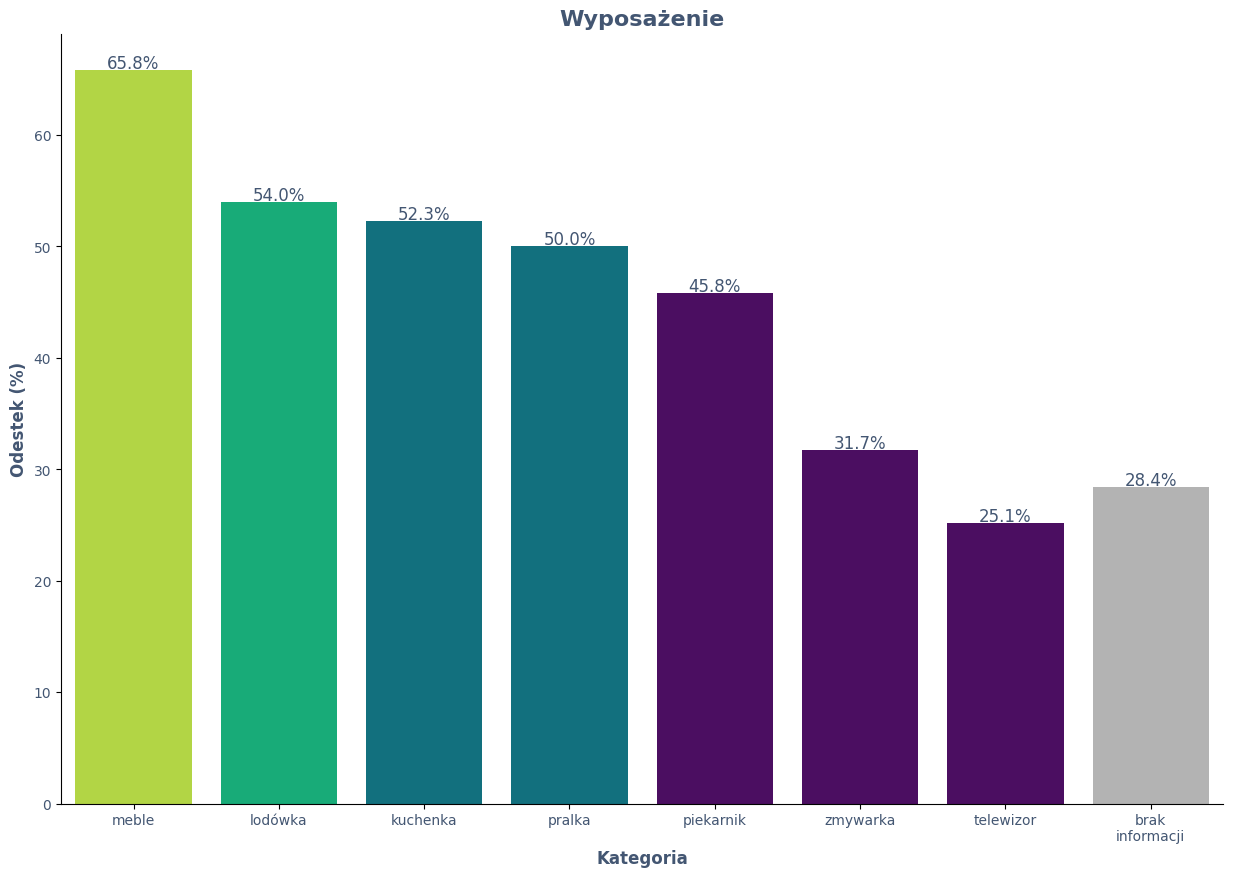

In [103]:
visualize_true_percentage_by_category(combined_df, 'wyposażenie')

**Wnioski wyposażenie**:

1. **Trendy w wyposażeniu mieszkań**:<br>
Meble znajdują się w `65,8%` mieszkań, podczas gdy `lodówki` i `kuchenki` są obecne odpowiednio w `54%` i `52,3%` ofert, a `pralki` znajdują się dokładnie w `połowie` ofert. Wskazuje to na skłonność do wyposażania mieszkań w niezbędne urządzenia dla najemców poszukujących nieruchomości gotowych do zamieszkania.
1. **Rzadsze udogodnienia**:<br>
Obecność `telewizorów` w `25,1%` i `zmywarek` w `31,7%` ofert pokazuje, że są one mniej powszechne, prawdopodobnie i są uważane za nieistotne.

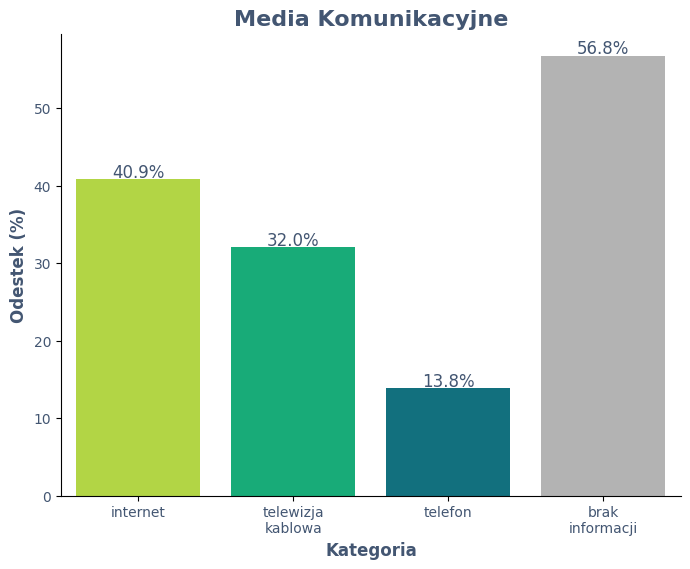

In [104]:
visualize_true_percentage_by_category(combined_df, 'media_komunikacyjne')

**Wnioski usługi multimedialne**:
1. **Powszechność**:<br>
`Dostęp do Internetu` jest wymieniony w `40,9%` ofert i `32,0%` dla `telewizji kablowej`.
1. **Brak informacji**:<br>
`Brak informacji` o typach mediów jest zgłaszany w `56,8%` ofert, co pokazuje, że dla większości są to nieistotne informacje.

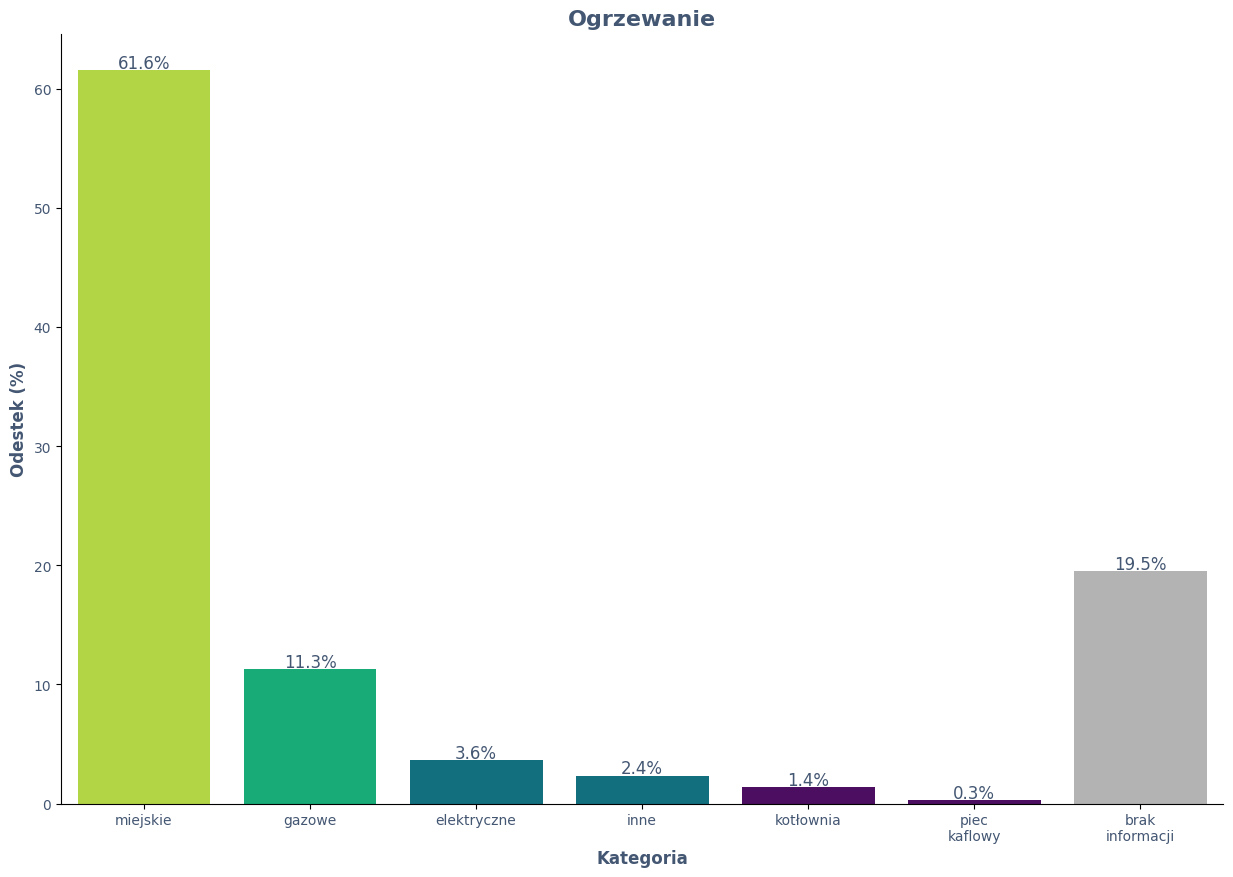

In [105]:
visualize_true_percentage_by_category(combined_df, 'ogrzewanie')

**Wnioski dotyczące ogrzewania**:

1. **Ogrzewanie miejskie**:<br>
jest najczęściej zgłaszanym typem (`61,6%`).
1. **Inne ogrzewanie**:<br>
Ogrzewanie gazowe (`11,3%`), a zwłaszcza `elektryczne` (`3,6%`) jest mało spotykane głównie ze względu na wysokie koszty.


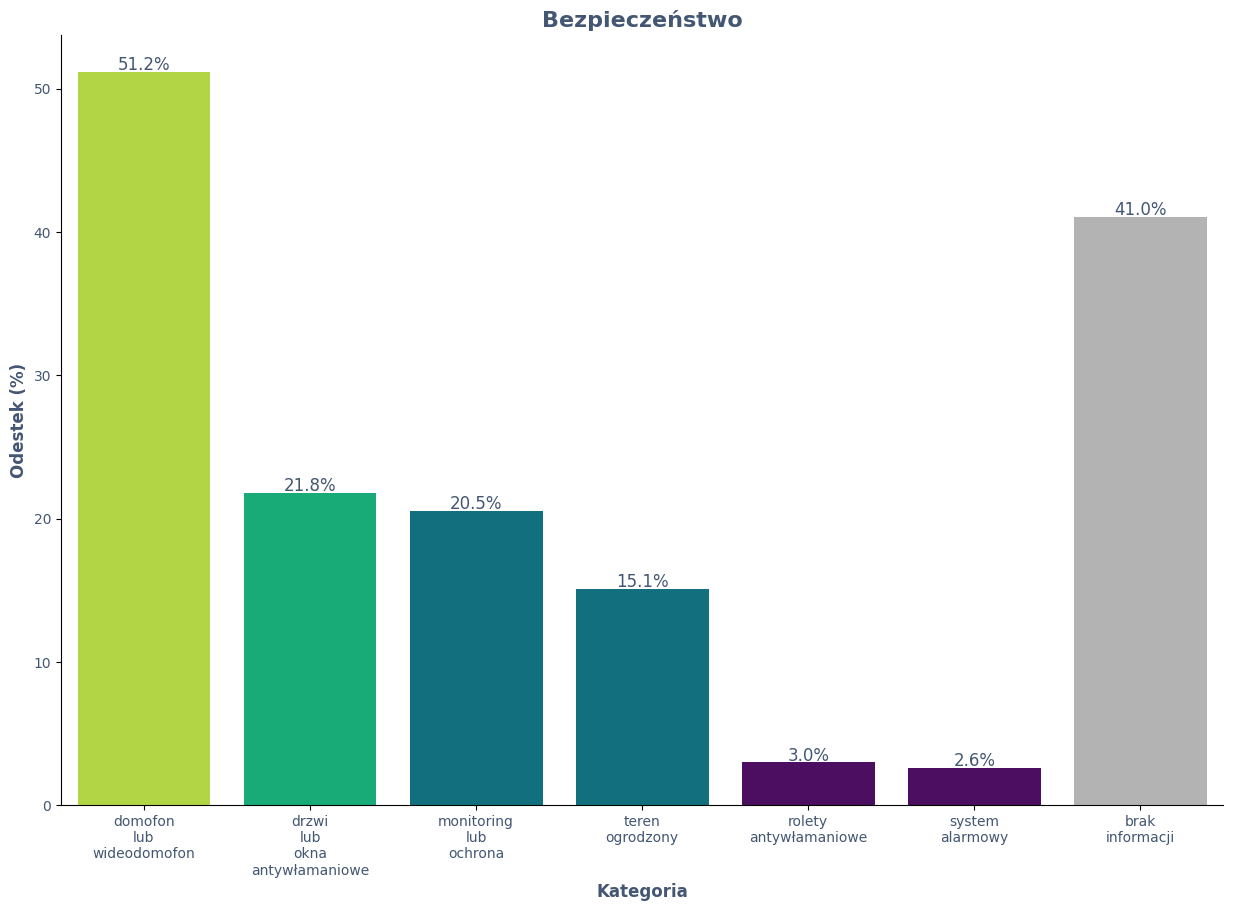

In [106]:
visualize_true_percentage_by_category(combined_df, 'bezpieczeństwo')

**Wnioski dotyczące zabezpieczeń**:

1. **Systemy Domofonowe:**:<br>
`Systemy domofonowe` lub `wideodomofonowe` są wymienione w `51,2%` ofert, co świadczy o ich powszechnym występowaniu.
1. **Zaawansowanych Zabezpieczeń**:<br>
Bardziej zaawansowane funkcje bezpieczeństwa, takie jak `systemy alarmowe`, są wspomniane tylko w `2,6%` ofert, a rolety antywłamaniowe w `3,0%`, co sugeruje, że mogą być one rzadziej spotykane lub wyróżniane wyłącznie w ofertach premium.

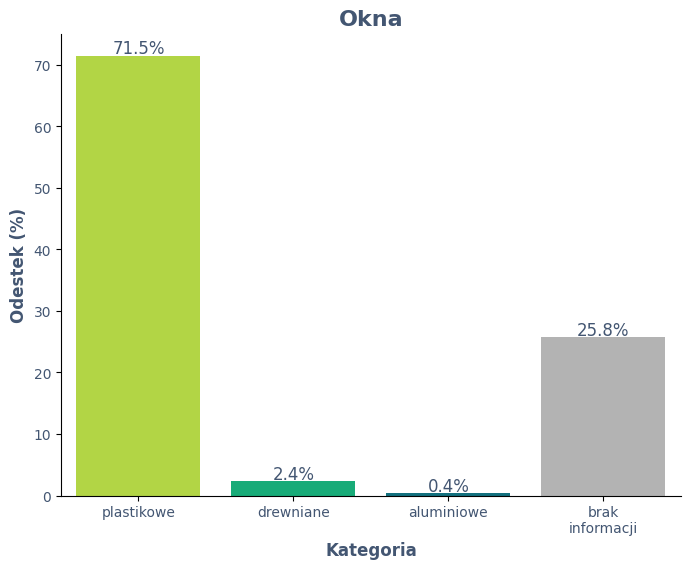

In [107]:
visualize_true_percentage_by_category(combined_df, 'okna')

**Wnioski okna**:

1. **Plastik**:<br>
Okna `plastikowe` dominują w cechach na poziomie `71,5%`.
1. **Brak informacji**:<br>
Zauważalny jest "brak informacji" w `25,8%` ofert dotyczących typów okien.

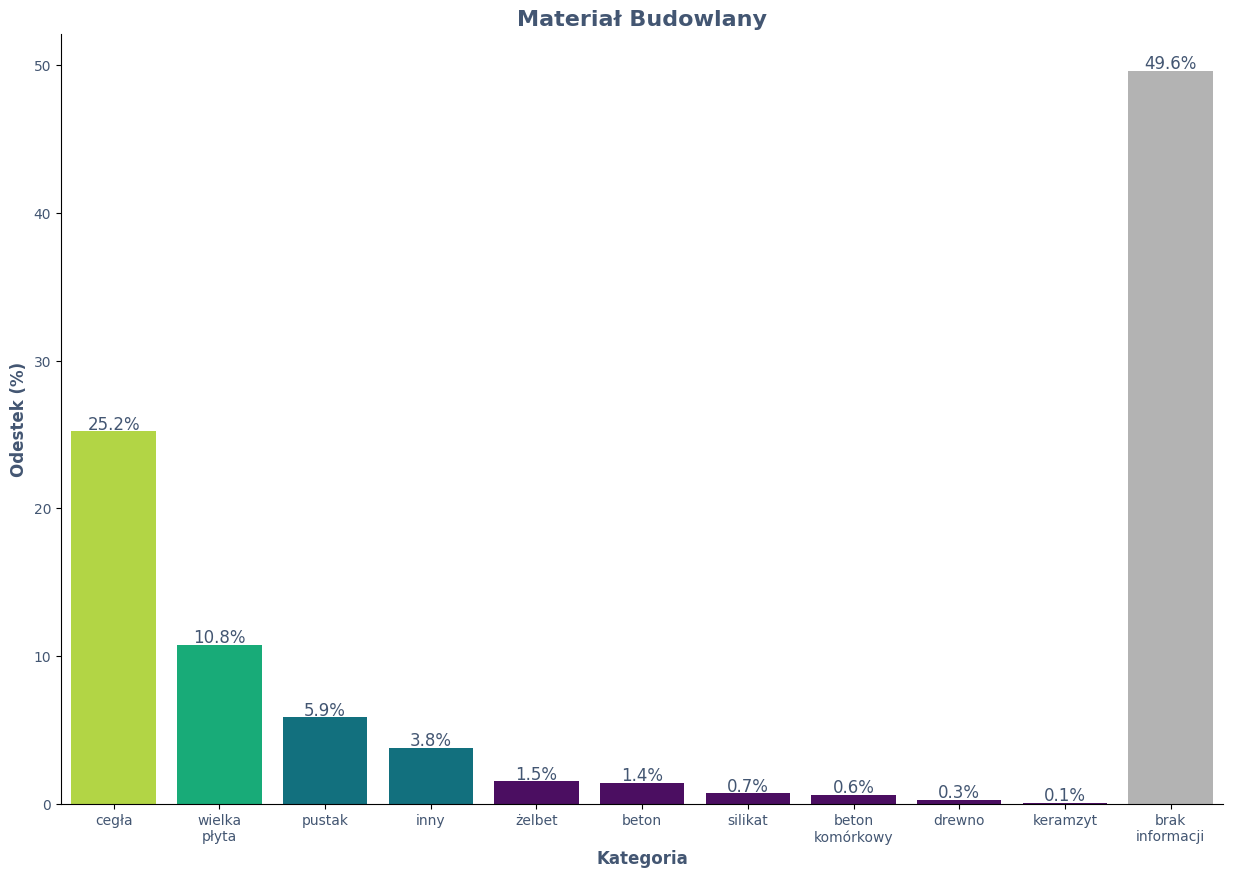

In [108]:
visualize_true_percentage_by_category(combined_df, 'materiał_budowlany')

**Wnioski materiał budowlany**:

1. **Cegła**:<br>
jest określona w `25,2%` nieruchomości.
1. **Wielka płyta**:<br>
jest wymieniany w `10,8%`, ale wynik może być mniejszy przez niewymienienie go ze względu na niepopularność wśród potencjalnych najemców.
1. **Brak informacji**:<br>
Prawie połowa ofert, `49,6%`, nie ujawnia materiału budowlanego.

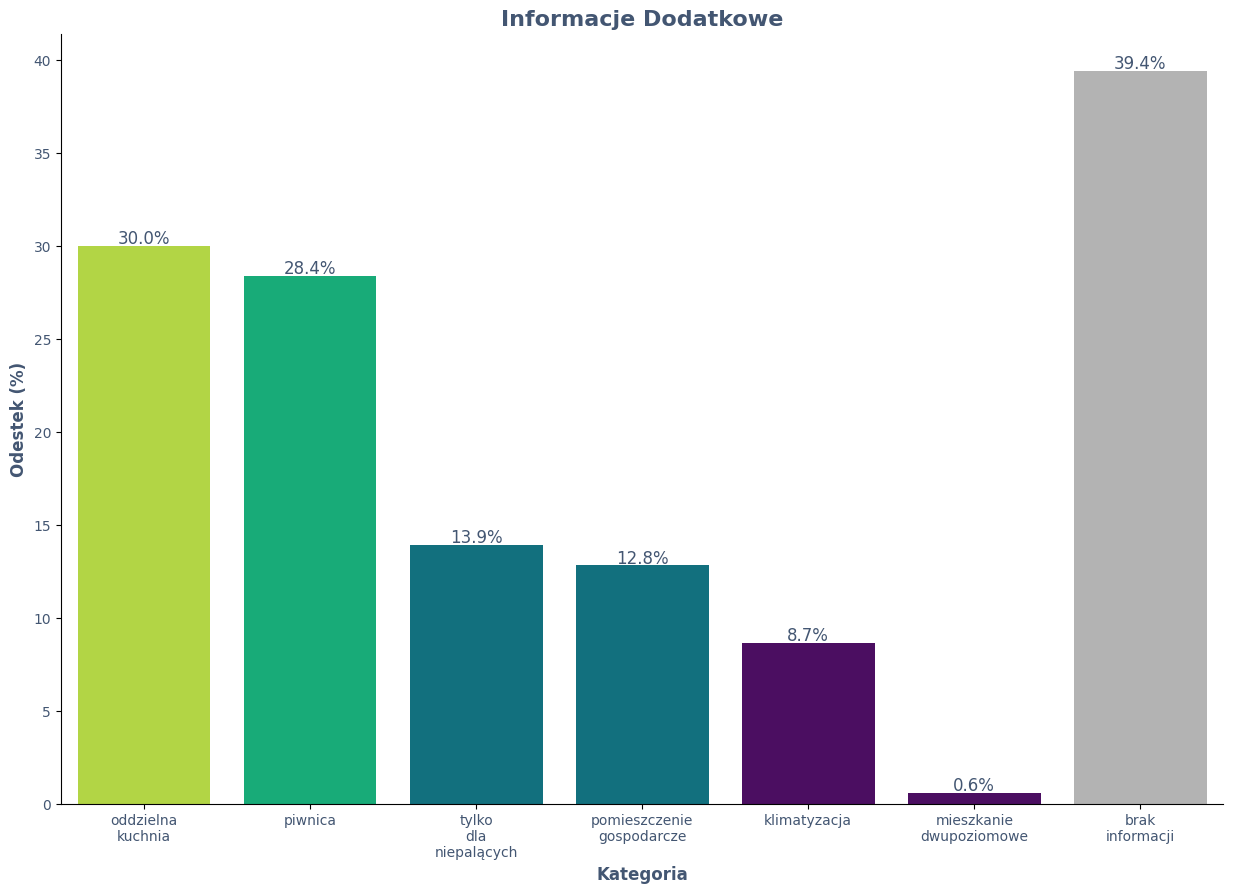

In [109]:
visualize_true_percentage_by_category(combined_df, 'informacje_dodatkowe')

**Wnioski dodatkowe informacje**:
1. **Częste**:<br>
`Oddzielna kuchnia` i `piwnica` to odpowiednio `30,0%` i `28,4%` ofert.

1. **Rzadkie**:<br>
Mniejszy, ale znaczący odsetek ofert określa `tylko dla niepalących` (13,9%) oraz `pomieszczenie gospodarcze` (12,8%).

1. **Bardzo rzadkie**:<br>
`Klimatyzacja` i `duplex` są rzadkie, odpowiednio `8,7%` i `0,6%`, co może sugerować, że te cechy są niestandardowe. Przeważająca liczba ofert `(39,4%) `nie dostarcza żadnych dodatkowych informacji`.
